In [1]:
import os
from dotenv import load_dotenv
import time 
import ast
import sqlite3
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
load_dotenv()

rent_cast_api_key = os.getenv('API_KEY')

if rent_cast_api_key:
    print("API Key loaded successfully!")
else:
    print("API Key not found. Please check your .env file.")


API Key loaded successfully!


In [3]:
 # Property Records
 # Query Params
 #state = 'FL'
 #saleDateRange = '365'
 #limit = 500  # Max limit per request
 #offset = 0    # Starting offset
 #total_properties = 145000  # Total number of properties you want
 #properties = []  # List to store properties
 #url = 'https://api.rentcast.io/v1/properties'

In [4]:
# # Function to get properties
#def get_properties(offset):
#     queryparams = {
#         'state': state,
#         'saleDateRange': saleDateRange,
#         'limit': limit,
#         'offset': offset
#     }
#     headers = {
#         "accept": "application/json",
#         "X-Api-Key": rent_cast_api_key
#     }
    
#     response = requests.get(url, headers=headers, params=queryparams)
    
#     # Check if response is successful
#     if response.status_code == 200:
#         data = response.json()
#         return data  # The response is already a list, so return it directly
#     else:
#         print(f"Error {response.status_code}: {response.text}")
#         return []

In [5]:
# # Loop through requests and get the properties
#while len(properties) < total_properties:
     #print(f"Getting properties: {len(properties)} / {total_properties}")
     #current_properties = get_properties(offset)
    
     #if not current_properties:
     #    print("No more properties found.")
    #     break
    
     #properties.extend(current_properties) 
     #offset += limit  
    
     #time.sleep(1)

In [6]:
property_record_one = pd.read_csv('/workspaces/mds8-final-project-bmh/src/property_record_one.csv')
property_record_two = pd.read_csv('/workspaces/mds8-final-project-bmh/src/property_record_two.csv')

In [7]:
# Read in the .csv file
#property_record_one = pd.read_csv('./src/property_record_one.csv')
#property_record_two = pd.read_csv('./src/property_record_two.csv')

In [8]:
combined_df = pd.concat([property_record_one, property_record_two], ignore_index=True)

In [9]:
print(property_record_one.shape)
print(property_record_two.shape)

(72500, 29)
(72500, 29)


In [10]:
rent_cast_data = combined_df

In [11]:
rent_cast_data = rent_cast_data.drop_duplicates()


In [12]:
rent_cast_data.duplicated().sum()

np.int64(0)

In [13]:
rent_cast_data.dtypes

id                   object
formattedAddress     object
addressLine1         object
addressLine2         object
city                 object
state                object
zipCode               int64
county               object
latitude            float64
longitude           float64
propertyType         object
bedrooms            float64
bathrooms           float64
squareFootage       float64
lotSize             float64
yearBuilt           float64
assessorID           object
legalDescription     object
subdivision          object
zoning               object
lastSaleDate         object
lastSalePrice       float64
features             object
taxAssessments       object
propertyTaxes        object
history              object
owner                object
ownerOccupied        object
hoa                  object
dtype: object

In [14]:
pd.set_option('display.max_columns', None)

In [15]:
rent_cast_data.lastSaleDate = pd.to_datetime(rent_cast_data.lastSaleDate)

rent_cast_data['year_month'] = rent_cast_data['lastSaleDate'].dt.to_period('M')

m_rate = {
'2024-03':0.0682,
'2024-04':0.0699,
'2024-05':0.076,
'2024-06':0.0692,
'2024-07':0.0685,
'2024-08':0.065,
'2024-09':0.0618,
'2024-10':0.0643,
'2024-11':0.0681,
'2024-12':0.0672,
'2025-01':0.0668
}

rent_cast_data['year_month'] = rent_cast_data['year_month'].dt.strftime('%Y-%m')

rent_cast_data['m_rate'] = rent_cast_data['year_month'].map(m_rate)

/tmp/ipykernel_22880/2807021962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_cast_data.lastSaleDate = pd.to_datetime(rent_cast_data.lastSaleDate)
/tmp/ipykernel_22880/2807021962.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  rent_cast_data['year_month'] = rent_cast_data['lastSaleDate'].dt.to_period('M')
/tmp/ipykernel_22880/2807021962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_cast_data['year_month'] = rent_cast_data['lastSaleDat

In [16]:
print(rent_cast_data['propertyType'].unique())
print(rent_cast_data['propertyType'].value_counts())

['Condo' 'Single Family' 'Townhouse' 'Land' 'Multi-Family' 'Manufactured'
 nan 'Apartment']
propertyType
Single Family    99979
Condo            22428
Land             11797
Manufactured      3772
Multi-Family      2397
Townhouse         1732
Apartment          551
Name: count, dtype: int64


In [17]:
apartment_data = rent_cast_data[rent_cast_data['propertyType'] == 'Apartment']

min_price = apartment_data['lastSalePrice'].min()
median_price = apartment_data['lastSalePrice'].median()
max_price = apartment_data['lastSalePrice'].max()
mean_price = apartment_data['lastSalePrice'].mean()
mode_price = apartment_data['lastSalePrice'].mode()[0]  

print("Min Price:", min_price)
print("Median Price:", median_price)
print("Max Price:", max_price)
print("Mean Price:", mean_price)
print("Mode Price:", mode_price)

Min Price: 5000.0
Median Price: 495000.0
Max Price: 139250000.0
Mean Price: 4215296.533575318
Mode Price: 3700000.0


/tmp/ipykernel_22880/3264417908.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apartment_data['Price Category'] = pd.cut(apartment_data['lastSalePrice'], bins=bins, labels=labels, right=False)


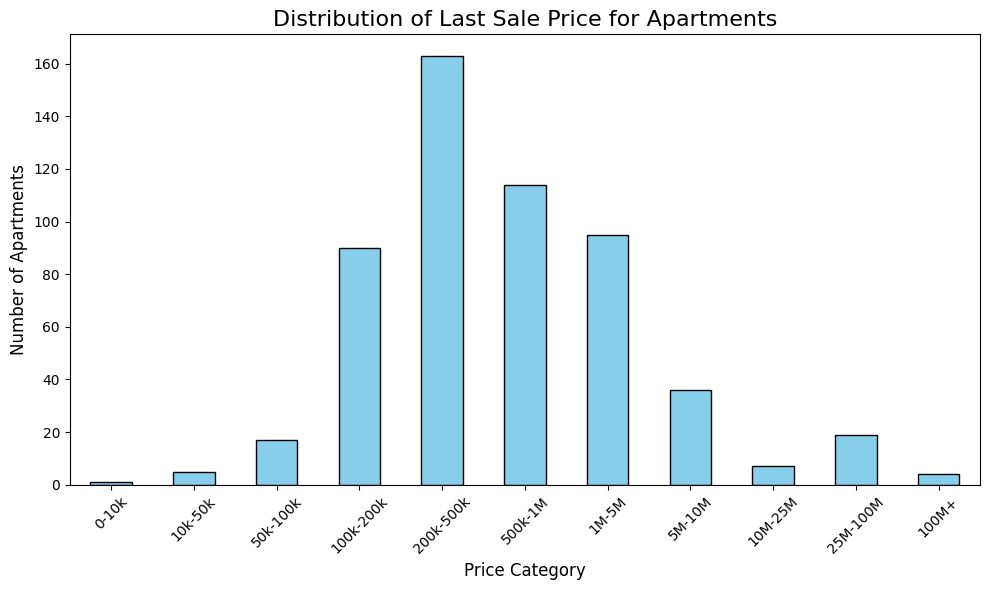

In [18]:
bins = [0, 10000, 50000, 100000, 200000, 500000, 1000000, 5000000, 10000000, 25000000, 100000000, 150000000]
labels = ['0-10k', '10k-50k', '50k-100k', '100k-200k', '200k-500k', '500k-1M', '1M-5M', '5M-10M', '10M-25M', '25M-100M', '100M+']

apartment_data = rent_cast_data[rent_cast_data['propertyType'] == 'Apartment']

apartment_data['Price Category'] = pd.cut(apartment_data['lastSalePrice'], bins=bins, labels=labels, right=False)

price_counts = apartment_data['Price Category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Last Sale Price for Apartments', fontsize=16)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Number of Apartments', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

In [19]:
# Filtering for 'Apartment' homes with lastSalePrice between 100k and 825k
rent_cast_data = rent_cast_data[~((rent_cast_data['propertyType'] == 'Apartment') & 
                                  ((rent_cast_data['lastSalePrice'] > 825000) | 
                                   (rent_cast_data['lastSalePrice'] < 100000)))]

rent_cast_data['propertyType'].value_counts()

propertyType
Single Family    99979
Condo            22428
Land             11797
Manufactured      3772
Multi-Family      2397
Townhouse         1732
Apartment          335
Name: count, dtype: int64

In [20]:
townhouse_data = rent_cast_data[rent_cast_data['propertyType'] == 'Townhouse']

min_price = townhouse_data['lastSalePrice'].min()
median_price = townhouse_data['lastSalePrice'].median()
max_price = townhouse_data['lastSalePrice'].max()
mean_price = townhouse_data['lastSalePrice'].mean()
mode_price = townhouse_data['lastSalePrice'].mode()[0]  

print(f"Min Price: {min_price}")
print(f"Median Price: {median_price}")
print(f"Max Price: {max_price}")
print(f"Mean Price: {mean_price}")
print(f"Mode Price: {mode_price}")

Min Price: 410.0
Median Price: 345800.0
Max Price: 35714286.0
Mean Price: 1014355.2232504338
Mode Price: 300000.0


/tmp/ipykernel_22880/420867537.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  townhouse_data['Price Category'] = pd.cut(townhouse_data['lastSalePrice'], bins=bins, labels=labels, right=False)


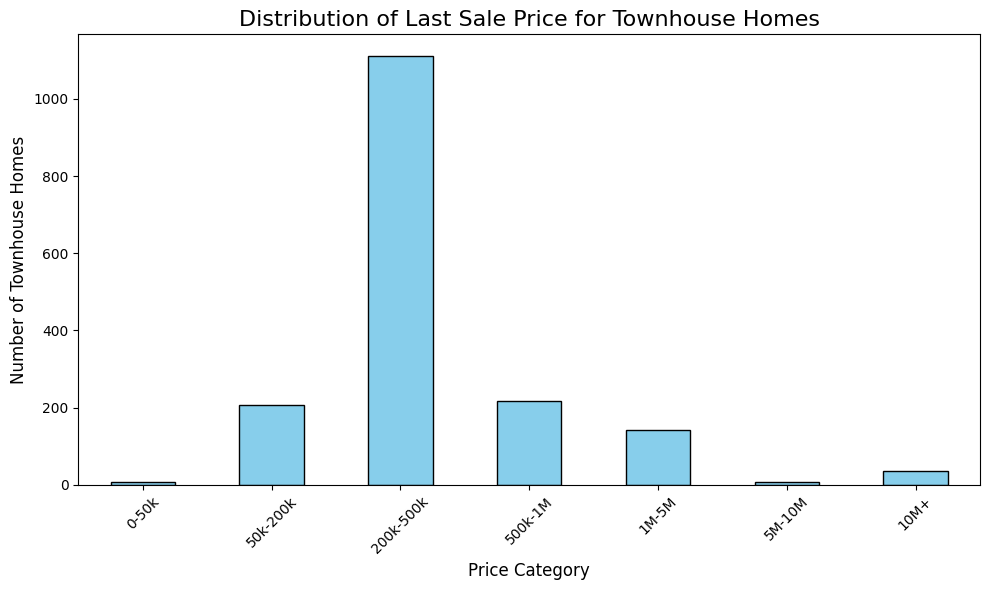

In [21]:
townhouse_data = rent_cast_data[rent_cast_data['propertyType'] == 'Townhouse']

bins = [0, 50000, 200000, 500000, 1000000, 5000000, 10000000, 35714286]
labels = ['0-50k', '50k-200k', '200k-500k', '500k-1M', '1M-5M', '5M-10M', '10M+']

townhouse_data['Price Category'] = pd.cut(townhouse_data['lastSalePrice'], bins=bins, labels=labels, right=False)

price_counts = townhouse_data['Price Category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Last Sale Price for Townhouse Homes', fontsize=16)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Number of Townhouse Homes', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

In [22]:
# Removed 'Townhouse' homes with a 'lastSalePrice' over 800k
rent_cast_data = rent_cast_data[~((rent_cast_data['propertyType'] == 'Townhouse') & (rent_cast_data['lastSalePrice'] > 800000))]
rent_cast_data['propertyType'].value_counts()

propertyType
Single Family    99979
Condo            22428
Land             11797
Manufactured      3772
Multi-Family      2397
Townhouse         1511
Apartment          335
Name: count, dtype: int64

In [23]:
multi_family_data = rent_cast_data[rent_cast_data['propertyType'] == 'Multi-Family']

min_saleprice = multi_family_data['lastSalePrice'].min()
median_saleprice = multi_family_data['lastSalePrice'].median()
max_saleprice = multi_family_data['lastSalePrice'].max()
mean_saleprice = multi_family_data['lastSalePrice'].mean()
mode_saleprice = multi_family_data['lastSalePrice'].mode()[0] 

print(f"Min Sale Price: {min_saleprice}")
print(f"Median Sale Price: {median_saleprice}")
print(f"Max Sale Price: {max_saleprice}")
print(f"Mean Sale Price: {mean_saleprice}")
print(f"Mode Sale Price: {mode_saleprice}")

Min Sale Price: 6000.0
Median Sale Price: 475000.0
Max Sale Price: 111640000.0
Mean Sale Price: 799123.7430120985
Mode Sale Price: 500000.0


/tmp/ipykernel_22880/3715092442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_family_data['Price Category'] = pd.cut(multi_family_data['lastSalePrice'], bins=bins, labels=labels, right=False)


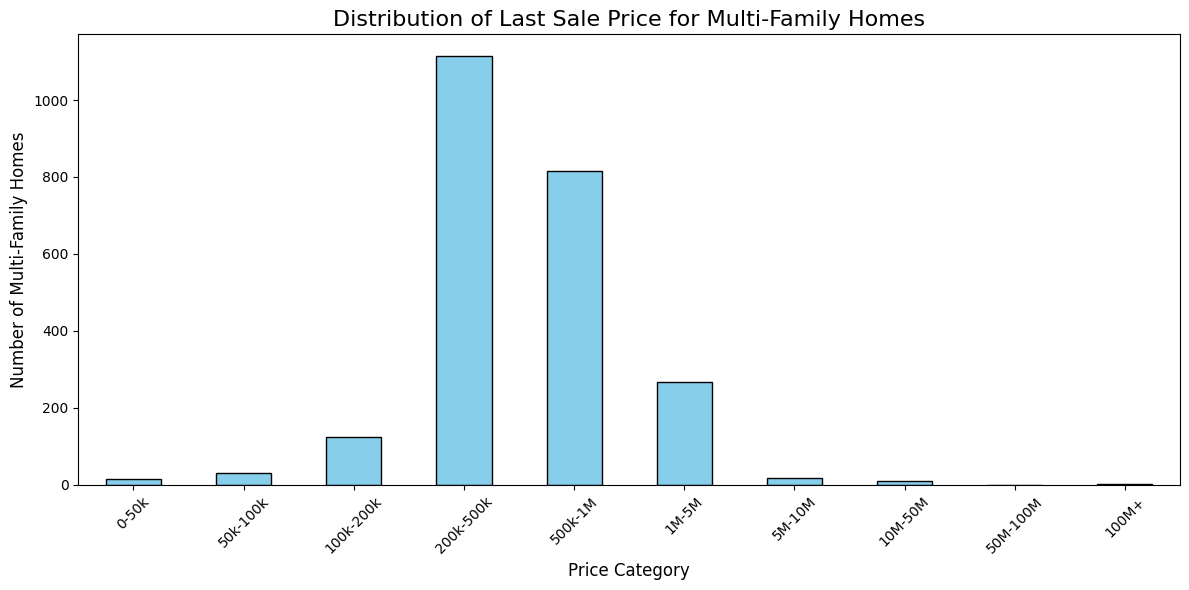

In [24]:
bins = [0, 50000, 100000, 200000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000, 250000000]
labels = ['0-50k', '50k-100k', '100k-200k', '200k-500k', '500k-1M', '1M-5M', '5M-10M', '10M-50M', '50M-100M', '100M+']

multi_family_data = rent_cast_data[rent_cast_data['propertyType'] == 'Multi-Family']

multi_family_data['Price Category'] = pd.cut(multi_family_data['lastSalePrice'], bins=bins, labels=labels, right=False)

price_counts = multi_family_data['Price Category'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Last Sale Price for Multi-Family Homes', fontsize=16)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Number of Multi-Family Homes', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

In [25]:
# Filtering the DataFrame to exclude 'Multi-Family' homes with 'lastSalePrice' > 1M
rent_cast_data = rent_cast_data[~((rent_cast_data['propertyType'] == 'Multi-Family') & (rent_cast_data['lastSalePrice'] > 1000000))]
rent_cast_data['propertyType'].value_counts()

propertyType
Single Family    99979
Condo            22428
Land             11797
Manufactured      3772
Multi-Family      2106
Townhouse         1511
Apartment          335
Name: count, dtype: int64

In [26]:
manufactured_data = rent_cast_data[rent_cast_data['propertyType'] == 'Manufactured']

min_sale_price = manufactured_data['lastSalePrice'].min()
median_sale_price = manufactured_data['lastSalePrice'].median()
max_sale_price = manufactured_data['lastSalePrice'].max()
mean_sale_price = manufactured_data['lastSalePrice'].mean()
mode_sale_price = manufactured_data['lastSalePrice'].mode()[0]

print(f"Min Sale Price: {min_sale_price}")
print(f"Median Sale Price: {median_sale_price}")
print(f"Max Sale Price: {max_sale_price}")
print(f"Mean Sale Price: {mean_sale_price}")
print(f"Mode Sale Price: {mode_sale_price}")

Min Sale Price: 600.0
Median Sale Price: 150000.0
Max Sale Price: 22500000.0
Mean Sale Price: 182260.8321845175
Mode Sale Price: 150000.0


/tmp/ipykernel_22880/3815775756.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manufactured_data['Price Category'] = pd.cut(manufactured_data['lastSalePrice'], bins=bins, labels=labels, right=False)


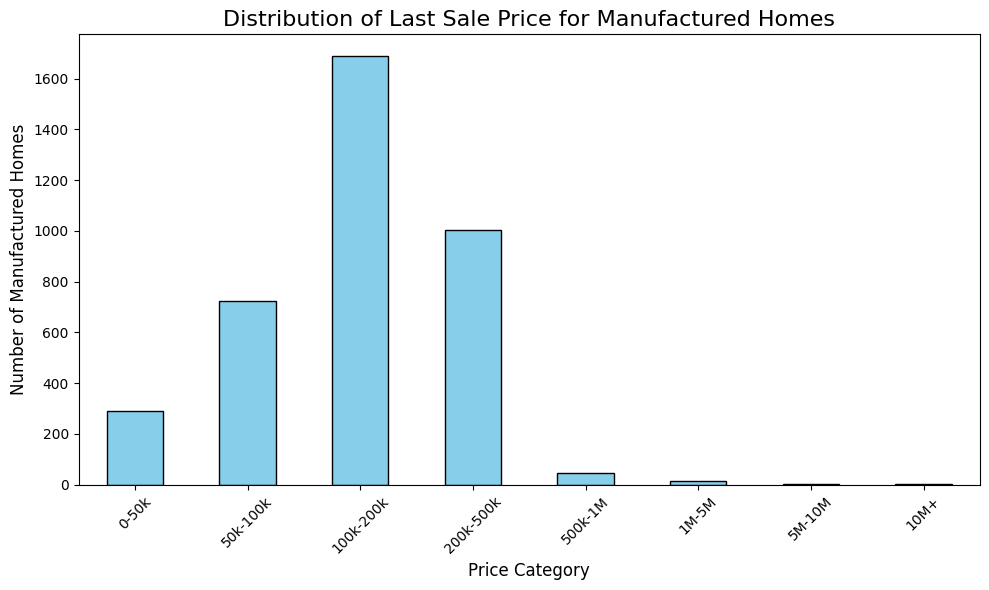

In [27]:
bins = [0, 50000, 100000, 200000, 500000, 1000000, 5000000, 10000000, 25000000]
labels = ['0-50k', '50k-100k', '100k-200k', '200k-500k', '500k-1M', '1M-5M', '5M-10M', '10M+']

manufactured_data['Price Category'] = pd.cut(manufactured_data['lastSalePrice'], bins=bins, labels=labels, right=False)

price_counts = manufactured_data['Price Category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Last Sale Price for Manufactured Homes', fontsize=16)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Number of Manufactured Homes', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

In [28]:
# Drop rows where 'Single Family' homes have a 'lastSalePrice' greater than 900K
rent_cast_data = rent_cast_data[~((rent_cast_data['propertyType'] == 'Manufactured') & (rent_cast_data['lastSalePrice'] > 900000))]

print(rent_cast_data['propertyType'].value_counts())

propertyType
Single Family    99979
Condo            22428
Land             11797
Manufactured      3752
Multi-Family      2106
Townhouse         1511
Apartment          335
Name: count, dtype: int64


In [29]:
condo_data = rent_cast_data[rent_cast_data['propertyType'] == 'Condo']

min_sale_price = condo_data['lastSalePrice'].min()
median_sale_price = condo_data['lastSalePrice'].median()
max_sale_price = condo_data['lastSalePrice'].max()
mean_sale_price = condo_data['lastSalePrice'].mean()
mode_sale_price = condo_data['lastSalePrice'].mode()[0]

print(f"Min Sale Price: {min_sale_price}")
print(f"Median Sale Price: {median_sale_price}")
print(f"Max Sale Price: {max_sale_price}")
print(f"Mean Sale Price: {mean_sale_price}")
print(f"Mode Sale Price: {mode_sale_price}")

Min Sale Price: 310.0
Median Sale Price: 280000.0
Max Sale Price: 345000000.0
Mean Sale Price: 486238.05507246376
Mode Sale Price: 200000.0


/tmp/ipykernel_22880/695457332.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condo_data['Price Category'] = pd.cut(condo_data['lastSalePrice'], bins=bins, labels=labels, right=False)


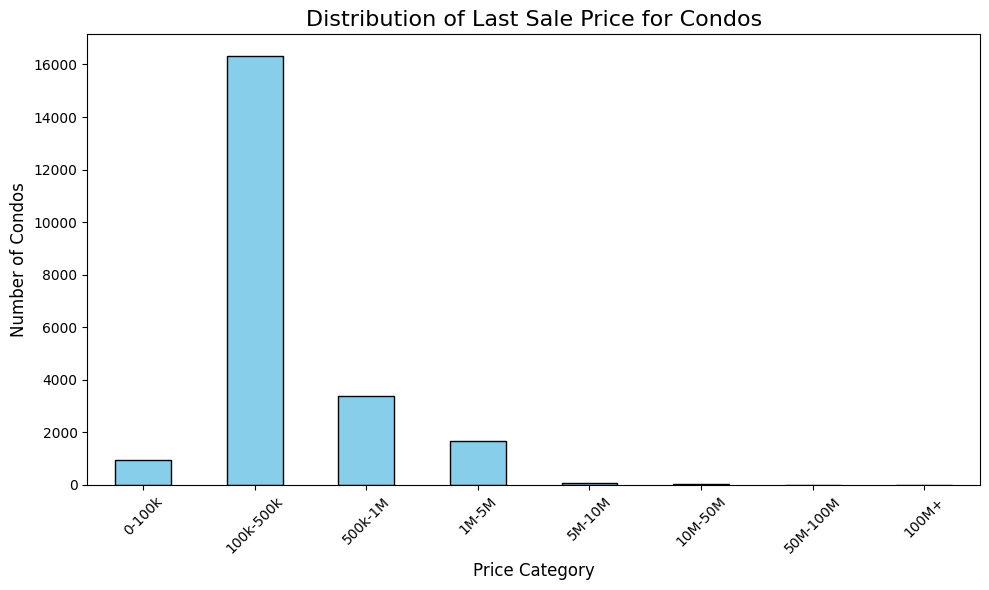

In [30]:
bins = [0, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000, condo_data['lastSalePrice'].max()]

labels = ['0-100k', '100k-500k', '500k-1M', '1M-5M', '5M-10M', '10M-50M', '50M-100M', '100M+']

condo_data['Price Category'] = pd.cut(condo_data['lastSalePrice'], bins=bins, labels=labels, right=False)

price_counts = condo_data['Price Category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Last Sale Price for Condos', fontsize=16)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Number of Condos', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [31]:
# Dropping rows out condos with 'lastSalePrice' > 900k
rent_cast_data = rent_cast_data[~((rent_cast_data['propertyType'] == 'Condo') & (rent_cast_data['lastSalePrice'] >= 900000))]

print(rent_cast_data['propertyType'].value_counts())

propertyType
Single Family    99979
Condo            20358
Land             11797
Manufactured      3752
Multi-Family      2106
Townhouse         1511
Apartment          335
Name: count, dtype: int64


In [32]:
single_family_data = rent_cast_data[rent_cast_data['propertyType'] == 'Single Family']

min_sale_price = single_family_data['lastSalePrice'].min()
median_sale_price = single_family_data['lastSalePrice'].median()
max_sale_price = single_family_data['lastSalePrice'].max()
mean_sale_price = single_family_data['lastSalePrice'].mean()
mode_sale_price = single_family_data['lastSalePrice'].mode()[0]

print(f"Min Sale Price: {min_sale_price}")
print(f"Median Sale Price: {median_sale_price}")
print(f"Max Sale Price: {max_sale_price}")
print(f"Mean Sale Price: {mean_sale_price}")
print(f"Mode Sale Price: {mode_sale_price}")

Min Sale Price: 300.0
Median Sale Price: 397000.0
Max Sale Price: 288000000.0
Mean Sale Price: 592821.5929315968
Mode Sale Price: 350000.0


/tmp/ipykernel_22880/4282403955.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_family_data['SalePriceCategory'] = pd.cut(single_family_data['lastSalePrice'], bins=bins, labels=labels, right=False)


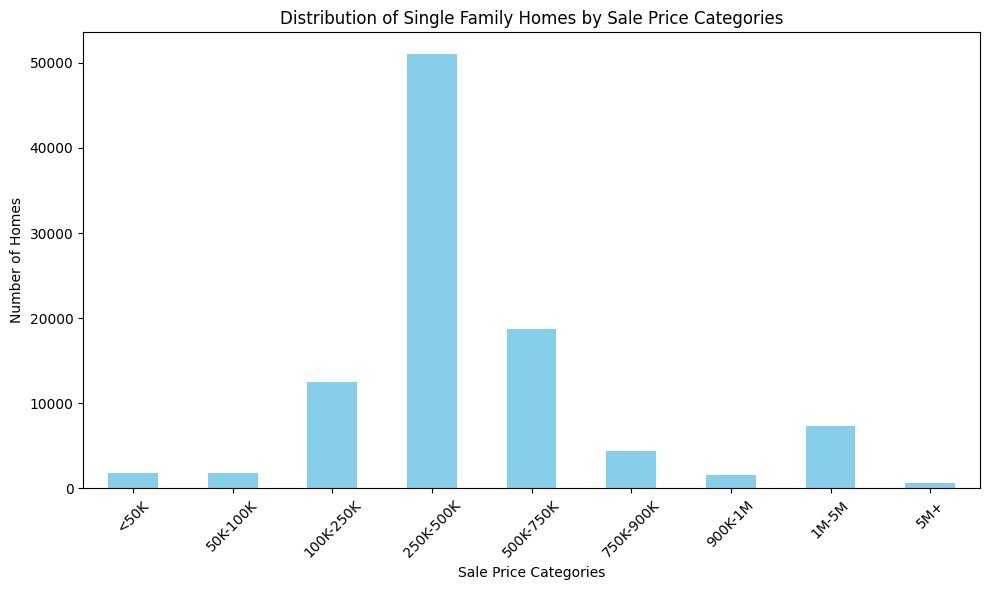

In [33]:
single_family_data = rent_cast_data[rent_cast_data['propertyType'] == 'Single Family']

bins = [0, 50000, 100000, 250000, 500000, 750000, 900000, 1000000, 5000000, float('inf')]
labels = ['<50K', '50K-100K', '100K-250K', '250K-500K', '500K-750K', '750K-900K', '900K-1M', '1M-5M', '5M+']

single_family_data['SalePriceCategory'] = pd.cut(single_family_data['lastSalePrice'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10,6))
single_family_data['SalePriceCategory'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Single Family Homes by Sale Price Categories')
plt.xlabel('Sale Price Categories')
plt.ylabel('Number of Homes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
# Drop rows where 'Single Family' homes have a 'lastSalePrice' greater than 900
rent_cast_data = rent_cast_data[~((rent_cast_data['propertyType'] == 'Single Family') & (rent_cast_data['lastSalePrice'] > 900000))]
rent_cast_data['propertyType'].value_counts()

propertyType
Single Family    90543
Condo            20358
Land             11797
Manufactured      3752
Multi-Family      2106
Townhouse         1511
Apartment          335
Name: count, dtype: int64

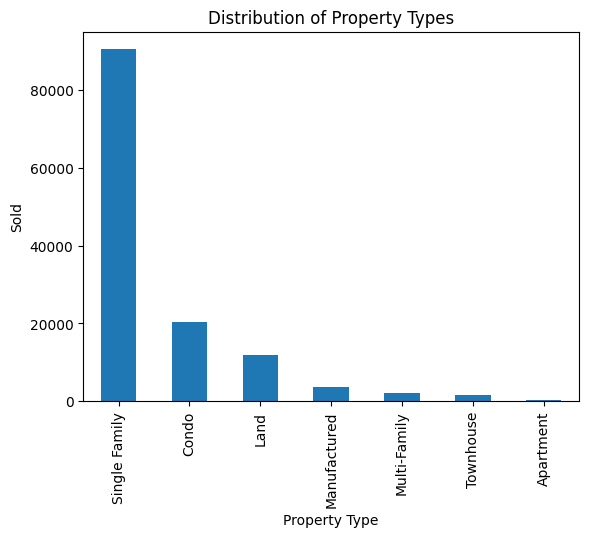

In [35]:
rent_cast_data['propertyType'].value_counts().plot(kind='bar')
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Sold')
plt.show()

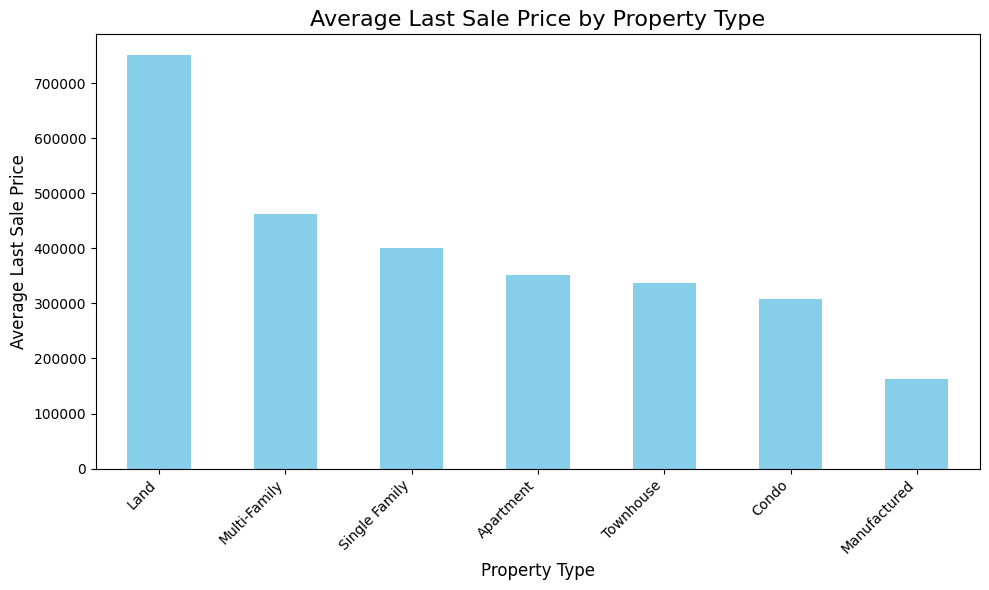

In [36]:
# Group by 'propertyType' and calculate the mean sale price for each property type
avg_price_by_property_type = rent_cast_data.groupby('propertyType')['lastSalePrice'].mean()

avg_price_by_property_type = avg_price_by_property_type.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_price_by_property_type.plot(kind='bar', color='skyblue')

plt.title('Average Last Sale Price by Property Type', fontsize=16)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Average Last Sale Price', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [37]:
rent_cast_data['features'].isnull().sum()

np.int64(31393)

In [38]:
rent_cast_data.dropna(subset=['features'], inplace=True)
rent_cast_data['features'].isnull().sum()

np.int64(0)

In [39]:
print(rent_cast_data.shape)
print(rent_cast_data['features'].nunique())

(101351, 31)
18548


In [40]:
rent_cast_data.shape

(101351, 31)

In [41]:
feature_list = ['cooling', 'fireplace', 'garage', 'heating', 'pool']

# Looping through each feature and creating a new column
for feature in feature_list:
    rent_cast_data[feature + '_present'] = rent_cast_data['features'].apply(
        lambda x: 1 if feature in str(x).lower() else 0
    )

In [42]:
rent_cast_data.shape

(101351, 36)

In [43]:
# List of features I want to create columns for
numeric_features = ['floorCount', 'roomCount', 'unitCount', 'garageSpaces']

# Loop through each feature and create a new column for it
for feature in numeric_features:
    rent_cast_data[feature] = rent_cast_data['features'].apply(
        lambda x: ast.literal_eval(str(x)).get(feature, None)  
    )

rent_cast_data.head()

,id,formattedAddress,addressLine1,addressLine2,city,state,zipCode,county,latitude,longitude,propertyType,bedrooms,bathrooms,squareFootage,lotSize,yearBuilt,assessorID,legalDescription,subdivision,zoning,lastSaleDate,lastSalePrice,features,taxAssessments,propertyTaxes,history,owner,ownerOccupied,hoa,year_month,m_rate,cooling_present,fireplace_present,garage_present,heating_present,pool_present,floorCount,roomCount,unitCount,garageSpaces
0,"2825-Palm-Beach-Blvd,-Apt-417,-Fort-Myers,-FL-...","2825 Palm Beach Blvd, Apt 417, Fort Myers, FL ...",2825 Palm Beach Blvd,Apt 417,Fort Myers,FL,33916,Lee,26.652413,-81.855762,Condo,2.0,2.0,1003.0,44417.0,2006.0,18-44-25-P1-03700.0417,ALTA MAR DESC INST#2006-83303 UNIT 417,CITY RIVER DISTRICT,B-1,2024-03-15 00:00:00+00:00,315000.0,"{'architectureType': 'Condo / Apartment', 'flo...","{'2019': {'year': 2019, 'value': 128393, 'impr...","{'2019': {'year': 2019, 'total': 2548}, '2022'...","{'2024-03-15': {'event': 'Sale', 'date': '2024...","{'names': ['Edgar K Collison', 'Muriel Colliso...",False,NaN,2024-03,0.0682,0,0,0,0,0,7.0,NaN,NaN,NaN
1,"3607-Bridgewood-Dr,-Jacksonville,-FL-32277","3607 Bridgewood Dr, Jacksonville, FL 32277",3607 Bridgewood Dr,NaN,Jacksonville,FL,32277,Duval,30.363895,-81.610043,Single Family,3.0,2.0,1921.0,4464.0,1992.0,128197-1276,38-58 38-2S-27E MARSH CREEK LOT 138,MARSH CREEK,PUD,2024-03-15 00:00:00+00:00,345000.0,"{'cooling': True, 'coolingType': 'Central', 'e...","{'2020': {'year': 2020, 'value': 158286, 'land...","{'2020': {'year': 2020, 'total': 2999}, '2021'...","{'2024-03-15': {'event': 'Sale', 'date': '2024...","{'names': ['Jessielyn Wade', 'Gregory Wade'], ...",True,NaN,2024-03,0.0682,1,0,1,1,0,2.0,NaN,1.0,2.0
2,"2025-Se-44th-St,-Cape-Coral,-FL-33904","2025 Se 44th St, Cape Coral, FL 33904",2025 Se 44th St,NaN,Cape Coral,FL,33904,Lee,26.568926,-81.932980,Single Family,3.0,2.0,2050.0,12000.0,1967.0,08-45-24-C3-00369.0550,CAPE CORAL UNIT 7 BLK.369 PB 12 PG 105 LOTS 55...,CAPE CORAL UNIT 7 EAST OF DEL PRADO,R1-W,2024-03-15 00:00:00+00:00,850000.0,"{'architectureType': 'Ranch', 'cooling': True,...","{'2023': {'year': 2023, 'value': 848351, 'land...","{'2023': {'year': 2023, 'total': 10682}}","{'2024-03-15': {'event': 'Sale', 'date': '2024...","{'names': ['D&D PROPERTIES OF CAPE COLE INC'],...",False,NaN,2024-03,0.0682,1,0,1,1,0,1.0,NaN,1.0,NaN
4,"11605-Sw-253rd-St,-Homestead,-FL-33032","11605 Sw 253rd St, Homestead, FL 33032",11605 Sw 253rd St,NaN,Homestead,FL,33032,Miami-Dade,25.532831,-80.379346,Single Family,3.0,2.5,1740.0,1870.0,2016.0,30-6030-003-7210,COCO PALM ESTATES PB 171-032 T-22608 LOT 5 BLK...,COCO PALM ESTATES,"3700:MULTI-FAM,10-21 U/A",2024-03-15 00:00:00+00:00,445000.0,{'floorCount': 2},"{'2021': {'year': 2021, 'value': 212001}, '202...","{'2022': {'year': 2022, 'total': 5737}, '2023'...","{'2024-03-15': {'event': 'Sale', 'date': '2024...","{'names': ['Eliecer Ferrer', 'Anay Diaz'], 'ty...",True,NaN,2024-03,0.0682,0,0,0,0,0,2.0,NaN,NaN,NaN
5,"2020-Continental-Ave,-Apt-203,-Tallahassee,-FL...","2020 Continental Ave, Apt 203, Tallahassee, FL...",2020 Continental Ave,Apt 203,Tallahassee,FL,32304,Leon,30.455487,-84.315107,Condo,2.0,1.0,990.0,871.0,1967.0,21-27-43-000-203-0,CHATEAU DE VILLE CONDOMINIUMS 27 1N 1W UNIT 20...,CHATEAU DE VILLE CONDOMINIUMS,NaN,2024-03-15 00:00:00+00:00,85000.0,"{'architectureType': 'Condo / Apartment', 'ext...","{'2023': {'year': 2023, 'value': 63360, 'impro...","{'2023': {'year': 2023, 'total': 1163}}","{'2024-03-15': {'event': 'Sale', 'date': '2024...","{'names': ['Charles Sheppard', 'Anneke Sheppar...",False,NaN,2024-03,0.0682,0,0,0,0,0,NaN,NaN,1.0,NaN


               floorCount  roomCount  unitCount  garageSpaces  lastSalePrice
floorCount       1.000000  -0.013613   0.002096      0.055246       0.066092
roomCount       -0.013613   1.000000  -0.003227      0.136474       0.069140
unitCount        0.002096  -0.003227   1.000000     -0.010710      -0.002627
garageSpaces     0.055246   0.136474  -0.010710      1.000000       0.207672
lastSalePrice    0.066092   0.069140  -0.002627      0.207672       1.000000


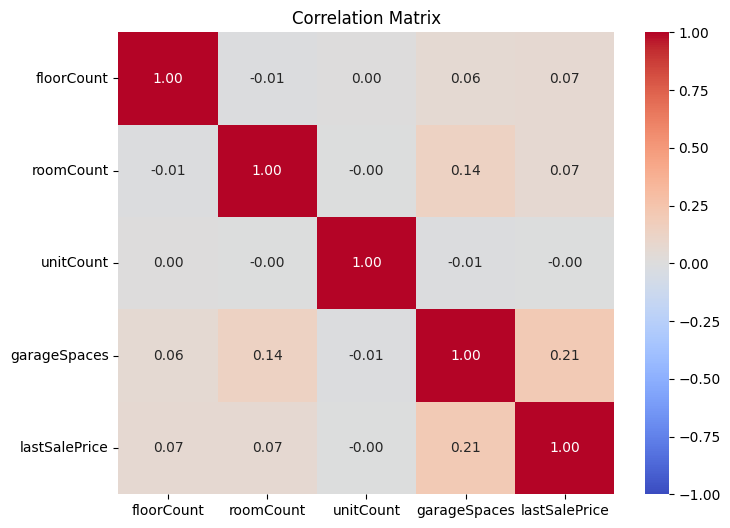

In [44]:
# Checking for correlation with 'lastSalePrice'
features_to_check = ['floorCount', 'roomCount', 'unitCount', 'garageSpaces', 'lastSalePrice']

correlation_matrix = rent_cast_data[features_to_check].corr()

print(correlation_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [45]:
# Features to drop based on the correlation analysis
features_to_drop = ['unitCount', 'roomCount']

rent_cast_data = rent_cast_data.drop(columns=features_to_drop)

In [46]:
columns_to_drop = ['addressLine1', 'addressLine2', 'state', 'owner', 'ownerOccupied', 'hoa', 'legalDescription', 
                   'subdivision', 'assessorID', 'zoning', 'taxAssessments', 'history', 'features', 'id']

rent_cast_data = rent_cast_data.drop(columns=columns_to_drop)

rent_cast_data.head()

,formattedAddress,city,zipCode,county,latitude,longitude,propertyType,bedrooms,bathrooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSalePrice,propertyTaxes,year_month,m_rate,cooling_present,fireplace_present,garage_present,heating_present,pool_present,floorCount,garageSpaces
0,"2825 Palm Beach Blvd, Apt 417, Fort Myers, FL ...",Fort Myers,33916,Lee,26.652413,-81.855762,Condo,2.0,2.0,1003.0,44417.0,2006.0,2024-03-15 00:00:00+00:00,315000.0,"{'2019': {'year': 2019, 'total': 2548}, '2022'...",2024-03,0.0682,0,0,0,0,0,7.0,NaN
1,"3607 Bridgewood Dr, Jacksonville, FL 32277",Jacksonville,32277,Duval,30.363895,-81.610043,Single Family,3.0,2.0,1921.0,4464.0,1992.0,2024-03-15 00:00:00+00:00,345000.0,"{'2020': {'year': 2020, 'total': 2999}, '2021'...",2024-03,0.0682,1,0,1,1,0,2.0,2.0
2,"2025 Se 44th St, Cape Coral, FL 33904",Cape Coral,33904,Lee,26.568926,-81.932980,Single Family,3.0,2.0,2050.0,12000.0,1967.0,2024-03-15 00:00:00+00:00,850000.0,"{'2023': {'year': 2023, 'total': 10682}}",2024-03,0.0682,1,0,1,1,0,1.0,NaN
4,"11605 Sw 253rd St, Homestead, FL 33032",Homestead,33032,Miami-Dade,25.532831,-80.379346,Single Family,3.0,2.5,1740.0,1870.0,2016.0,2024-03-15 00:00:00+00:00,445000.0,"{'2022': {'year': 2022, 'total': 5737}, '2023'...",2024-03,0.0682,0,0,0,0,0,2.0,NaN
5,"2020 Continental Ave, Apt 203, Tallahassee, FL...",Tallahassee,32304,Leon,30.455487,-84.315107,Condo,2.0,1.0,990.0,871.0,1967.0,2024-03-15 00:00:00+00:00,85000.0,"{'2023': {'year': 2023, 'total': 1163}}",2024-03,0.0682,0,0,0,0,0,NaN,NaN


In [47]:
# Drop rows where 'propertyType' is 'Land'
rent_cast_data_land = rent_cast_data[rent_cast_data['propertyType'] != 'Land']

# Verify that the rows with 'Land' have been dropped
print(f"Original shape: {rent_cast_data.shape}")
print(f"Cleaned shape: {rent_cast_data_land.shape}")

rent_cast_data = rent_cast_data_land

Original shape: (101351, 24)
Cleaned shape: (99787, 24)


In [48]:
rent_cast_data['propertyType'].value_counts()

propertyType
Single Family    74695
Condo            18925
Manufactured      3450
Multi-Family      1713
Townhouse          790
Apartment          212
Name: count, dtype: int64

In [49]:
rent_cast_data.shape

(99787, 24)

In [50]:
# Checking for NaN values in 'bedrooms' and 'bathrooms' columns
nan_bedrooms = rent_cast_data['bedrooms'].isna().sum()
nan_bathrooms = rent_cast_data['bathrooms'].isna().sum()

print(f"NaN values in 'bedrooms': {nan_bedrooms}")
print(f"NaN values in 'bathrooms': {nan_bathrooms}")

NaN values in 'bedrooms': 4032
NaN values in 'bathrooms': 2670


In [51]:
rent_cast_data_cleaned = rent_cast_data.dropna(subset=['bedrooms', 'bathrooms'], how='any')

print(f"Original shape: {rent_cast_data.shape}")
print(f"Cleaned shape: {rent_cast_data_cleaned.shape}")

rent_cast_data = rent_cast_data_cleaned

Original shape: (99787, 24)
Cleaned shape: (95722, 24)


In [52]:
rent_cast_data.shape

(95722, 24)

In [53]:
rent_cast_data.isnull().sum()

formattedAddress         0
city                     0
zipCode                  0
county                  54
latitude                 0
longitude                0
propertyType             1
bedrooms                 0
bathrooms                0
squareFootage           33
lotSize               8644
yearBuilt              156
lastSaleDate             0
lastSalePrice           14
propertyTaxes          681
year_month               0
m_rate                   0
cooling_present          0
fireplace_present        0
garage_present           0
heating_present          0
pool_present             0
floorCount           13889
garageSpaces         78566
dtype: int64

In [54]:
rent_cast_data_cleaned = rent_cast_data.dropna(subset=['propertyType'])

rent_cast_data = rent_cast_data_cleaned

In [55]:
rent_cast_data.shape

(95721, 24)

In [56]:
rent_cast_data = rent_cast_data.dropna(subset=['lastSalePrice'])

rent_cast_data['lastSalePrice'].isnull().sum()

np.int64(0)

In [57]:
rent_cast_data.head()

,formattedAddress,city,zipCode,county,latitude,longitude,propertyType,bedrooms,bathrooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSalePrice,propertyTaxes,year_month,m_rate,cooling_present,fireplace_present,garage_present,heating_present,pool_present,floorCount,garageSpaces
0,"2825 Palm Beach Blvd, Apt 417, Fort Myers, FL ...",Fort Myers,33916,Lee,26.652413,-81.855762,Condo,2.0,2.0,1003.0,44417.0,2006.0,2024-03-15 00:00:00+00:00,315000.0,"{'2019': {'year': 2019, 'total': 2548}, '2022'...",2024-03,0.0682,0,0,0,0,0,7.0,NaN
1,"3607 Bridgewood Dr, Jacksonville, FL 32277",Jacksonville,32277,Duval,30.363895,-81.610043,Single Family,3.0,2.0,1921.0,4464.0,1992.0,2024-03-15 00:00:00+00:00,345000.0,"{'2020': {'year': 2020, 'total': 2999}, '2021'...",2024-03,0.0682,1,0,1,1,0,2.0,2.0
2,"2025 Se 44th St, Cape Coral, FL 33904",Cape Coral,33904,Lee,26.568926,-81.932980,Single Family,3.0,2.0,2050.0,12000.0,1967.0,2024-03-15 00:00:00+00:00,850000.0,"{'2023': {'year': 2023, 'total': 10682}}",2024-03,0.0682,1,0,1,1,0,1.0,NaN
4,"11605 Sw 253rd St, Homestead, FL 33032",Homestead,33032,Miami-Dade,25.532831,-80.379346,Single Family,3.0,2.5,1740.0,1870.0,2016.0,2024-03-15 00:00:00+00:00,445000.0,"{'2022': {'year': 2022, 'total': 5737}, '2023'...",2024-03,0.0682,0,0,0,0,0,2.0,NaN
5,"2020 Continental Ave, Apt 203, Tallahassee, FL...",Tallahassee,32304,Leon,30.455487,-84.315107,Condo,2.0,1.0,990.0,871.0,1967.0,2024-03-15 00:00:00+00:00,85000.0,"{'2023': {'year': 2023, 'total': 1163}}",2024-03,0.0682,0,0,0,0,0,NaN,NaN


In [58]:
rent_cast_data['squareFootage'].isna().sum()


np.int64(33)

In [59]:
rent_cast_data = rent_cast_data.dropna(subset=['squareFootage'])

In [60]:
# Dropping homes with a 'lastSalePrice' of under 100k
rent_cast_data_filtered = rent_cast_data[rent_cast_data['lastSalePrice'] >= 100000]

print(rent_cast_data_filtered['lastSalePrice'].describe())

rent_cast_data = rent_cast_data_filtered

count      92371.000000
mean      387718.152169
std       176920.511780
min       100000.000000
25%       255500.000000
50%       355000.000000
75%       490000.000000
max      1000000.000000
Name: lastSalePrice, dtype: float64


In [61]:
# Droping homes with 'lastSalePrice' over 900k
rent_cast_data_filtered_price = rent_cast_data[rent_cast_data['lastSalePrice'] <= 900000]

print(rent_cast_data_filtered_price['lastSalePrice'].describe())

rent_cast_data = rent_cast_data_filtered_price

count     92335.000000
mean     387495.527525
std      176594.381753
min      100000.000000
25%      255250.000000
50%      355000.000000
75%      490000.000000
max      900000.000000
Name: lastSalePrice, dtype: float64


In [62]:
rent_cast_data['city'].value_counts()


city
Jacksonville        4696
Orlando             3488
Miami               3387
Tampa               3244
Saint Petersburg    1931
                    ... 
South Palm Beach       1
Hampton                1
Anna Maria             1
Wauchula               1
Watersound             1
Name: count, Length: 453, dtype: int64

In [63]:
rent_cast_data['city'].nunique()


453

In [64]:
# Getting the cities with 60 or fewer homes because i noticed cities without enough homes to build prediction on weakens the model
city_counts = rent_cast_data['city'].value_counts()  

cities_80_or_less = city_counts[city_counts <= 80]

num_cities_80_or_less = len(cities_80_or_less)

print(f"Total cities with 80 or fewer homes: {num_cities_80_or_less}")

cities_to_drop = cities_80_or_less.index

rent_cast_data_cleaned = rent_cast_data[~rent_cast_data['city'].isin(cities_to_drop)]

print(f"\nData after dropping cities with 80 or fewer homes:")

Total cities with 80 or fewer homes: 268

Data after dropping cities with 80 or fewer homes:


In [65]:
rent_cast_data = rent_cast_data_cleaned

In [66]:
rent_cast_data.dtypes

formattedAddress                  object
city                              object
zipCode                            int64
county                            object
latitude                         float64
longitude                        float64
propertyType                      object
bedrooms                         float64
bathrooms                        float64
squareFootage                    float64
lotSize                          float64
yearBuilt                        float64
lastSaleDate         datetime64[ns, UTC]
lastSalePrice                    float64
propertyTaxes                     object
year_month                        object
m_rate                           float64
cooling_present                    int64
fireplace_present                  int64
garage_present                     int64
heating_present                    int64
pool_present                       int64
floorCount                       float64
garageSpaces                     float64
dtype: object

In [67]:
rent_cast_data = rent_cast_data.dropna(subset=['squareFootage'])

In [68]:
rent_cast_data.shape

(86773, 24)

In [69]:
rent_cast_data['decade'] = (rent_cast_data['yearBuilt'] // 10) * 10

# Filtering for relevant decades (1980-2020)
rent_cast_data = rent_cast_data[rent_cast_data['decade'] >= 1980]

average_prices = rent_cast_data.groupby(['propertyType', 'decade'])['lastSalePrice'].mean().reset_index()

print(average_prices)

     propertyType  decade  lastSalePrice
0       Apartment  1980.0  354408.333333
1       Apartment  1990.0  305999.090909
2       Apartment  2000.0  366500.000000
3       Apartment  2010.0  648500.000000
4       Apartment  2020.0  427160.000000
5           Condo  1980.0  274100.472478
6           Condo  1990.0  329199.300116
7           Condo  2000.0  374064.958213
8           Condo  2010.0  478795.591002
9           Condo  2020.0  435140.951493
10   Manufactured  1980.0  185306.785285
11   Manufactured  1990.0  204051.143275
12   Manufactured  2000.0  226791.989474
13   Manufactured  2010.0  261036.956522
14   Manufactured  2020.0  240211.764706
15   Multi-Family  1980.0  373706.439850
16   Multi-Family  1990.0  503780.620690
17   Multi-Family  2000.0  392362.201183
18   Multi-Family  2010.0  432250.329545
19   Multi-Family  2020.0  450570.291971
20  Single Family  1980.0  378752.172381
21  Single Family  1990.0  443294.410394
22  Single Family  2000.0  429822.541871
23  Single Famil

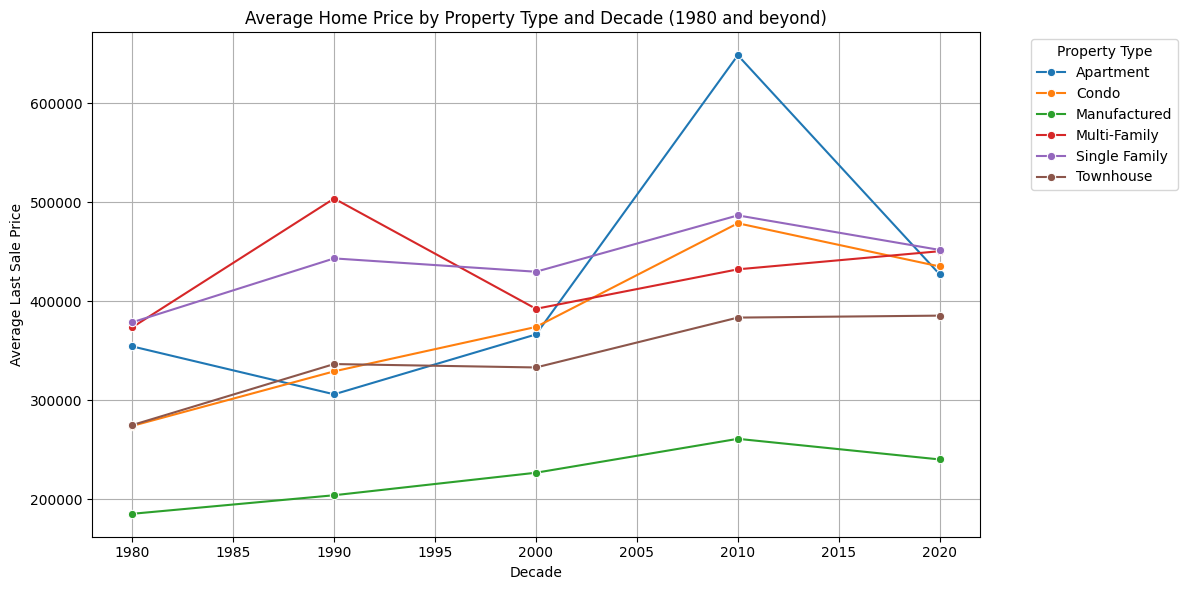

     propertyType  decade  price_change_percent
1       Apartment  1990.0            -13.659172
2       Apartment  2000.0             19.771598
3       Apartment  2010.0             76.944065
4       Apartment  2020.0            -34.131072
6           Condo  1990.0             20.101690
7           Condo  2000.0             13.628722
8           Condo  2010.0             27.997980
9           Condo  2020.0             -9.117594
11   Manufactured  1990.0             10.115311
12   Manufactured  2000.0             11.144680
13   Manufactured  2010.0             15.099725
14   Manufactured  2020.0             -7.977871
16   Multi-Family  1990.0             34.806513
17   Multi-Family  2000.0            -22.116456
18   Multi-Family  2010.0             10.166150
19   Multi-Family  2020.0              4.238276
21  Single Family  1990.0             17.040757
22  Single Family  2000.0             -3.039034
23  Single Family  2010.0             13.244115
24  Single Family  2020.0             -7

In [70]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_prices, x='decade', y='lastSalePrice', hue='propertyType', marker='o')
plt.title('Average Home Price by Property Type and Decade (1980 and beyond)')
plt.xlabel('Decade')
plt.ylabel('Average Last Sale Price')
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

average_prices['price_change_percent'] = average_prices.groupby('propertyType')['lastSalePrice'].pct_change() * 100

print(average_prices[['propertyType', 'decade', 'price_change_percent']].dropna())

# Home Prices are All Over the Place:
#Apartments: Prices shot up 76.94% from 2000-2010 but then plummeted by -34.13% from 2010-2020. This suggests big swings, maybe because of market changes or demand shifts.

#Condos: Condos had solid growth early on, with +20% from 1990-2000 and +28% from 2000-2010. But from 2010-2020, prices dropped by -9.12%—likely due to a mix of market correction and changing demand (more people leaning towards single-family homes?).

# -Manufactured Homes: These homes saw steady growth, with +15.1% from 2010 to 2020. However, there was a small dip between 2000 and 2010, so it's growing, but not without challenges.

# -Multi-Family: Multi-family homes had a huge spike in the '90s (+34.81%) but dropped by -22.12% from 2000 to 2010. Afterward, they stabilized but didn’t skyrocket, showing steady but slower growth.

# -Single-Family: Single-family homes did pretty well, with +17% from 1990-2000 and a solid +13.24% from 2010-2020. They bounced back after the 2008 crash and stayed strong during the pandemic.

# -Townhouses: Townhouses had decent growth from 1990 to 2000 (+22.42%) and +15.12% from 2010-2020. They dipped slightly in 2000-2010 but stayed consistent, especially in suburban areas.



In [71]:
# Droping homes with 'lastSalePrice' over 900k
rent_cast_data_filtered_price = rent_cast_data[rent_cast_data['lastSalePrice'] <= 900000]

print(rent_cast_data_filtered_price['lastSalePrice'].describe())

rent_cast_data = rent_cast_data_filtered_price

count     56510.000000
mean     406087.159016
std      170814.835719
min      100000.000000
25%      285000.000000
50%      375000.000000
75%      505000.000000
max      900000.000000
Name: lastSalePrice, dtype: float64


In [72]:
num_unique_cities = rent_cast_data['city'].nunique()

print(num_unique_cities)

185


In [73]:
rent_cast_data.dtypes

formattedAddress                  object
city                              object
zipCode                            int64
county                            object
latitude                         float64
longitude                        float64
propertyType                      object
bedrooms                         float64
bathrooms                        float64
squareFootage                    float64
lotSize                          float64
yearBuilt                        float64
lastSaleDate         datetime64[ns, UTC]
lastSalePrice                    float64
propertyTaxes                     object
year_month                        object
m_rate                           float64
cooling_present                    int64
fireplace_present                  int64
garage_present                     int64
heating_present                    int64
pool_present                       int64
floorCount                       float64
garageSpaces                     float64
decade          

In [74]:
city_names = rent_cast_data['city'].unique()

for city in city_names:
    print(city)

Fort Myers
Jacksonville
Homestead
Miami
Bonita Springs
Merritt Island
Palm Harbor
Lake Worth
Temple Terrace
Royal Palm Beach
Estero
Edgewater
Panama City
Sunrise
Lake Mary
Gainesville
Inverness
Tampa
Port Charlotte
Panama City Beach
Boynton Beach
Tallahassee
Ponte Vedra
Oviedo
Deltona
Palm Bay
West Palm Beach
Boca Raton
The Villages
Hollywood
Palm Coast
Leesburg
Davenport
Naples
Orange Park
Spring Hill
New Smyrna Beach
Clermont
Clearwater
Lakeland
Delray Beach
Englewood
Davie
Hialeah
Land O Lakes
Wesley Chapel
Saint Petersburg
Kissimmee
Sebring
New Port Richey
Yulee
Sarasota
Apollo Beach
Pembroke Pines
Saint Augustine
Lake Wales
Pensacola
Orlando
Ocala
Riverview
Valrico
Auburndale
Winter Springs
Palmetto
Jensen Beach
Fleming Island
Cutler Bay
Port Richey
Largo
Saint Cloud
Green Cove Springs
Winter Haven
Tarpon Springs
Freeport
Bradenton
Melbourne
Citrus Springs
Eustis
Wimauma
Seffner
Sebastian
Cape Coral
Fort Walton Beach
Fort Pierce
Port Saint Lucie
Venice
Punta Gorda
North Port
Jupit

In [75]:
rent_cast_data_cleaned = rent_cast_data.dropna(subset=['county'])

# Verify by checking the shape of the new dataframe
print(f"Original shape: {rent_cast_data.shape}")
print(f"Cleaned shape: {rent_cast_data_cleaned.shape}")
rent_cast_data = rent_cast_data_cleaned

Original shape: (56510, 25)
Cleaned shape: (56477, 25)


In [76]:
county_names = rent_cast_data['county'].unique()

for county in county_names:
    print(county)

Lee
Duval
Miami-Dade
Brevard
Pinellas
Palm Beach
Hillsborough
Volusia
Bay
Broward
Seminole
Alachua
Citrus
Charlotte
Leon
Saint Johns
Sumter
Flagler
Lake
Osceola
Collier
Clay
Hernando
Polk
Pasco
Highlands
Nassau
Sarasota
Escambia
Orange
Marion
Manatee
Martin
Walton
Indian River
Okaloosa
Saint Lucie
St. Lucie
St. Johns
Baker
Levy


In [77]:
# Group by both 'county' and 'city' to count the number of homes in each county-city combination
county_city_count = rent_cast_data.groupby(['county', 'city']).agg({'propertyType': 'count'}).sort_values('propertyType', ascending=False)

# Rename the column for clarity
county_city_count = county_city_count.rename(columns={'propertyType': 'home_count'})

# Get the top 25 county-city combinations with the most homes
top_25_county_city = county_city_count.head(25)

# Print the result
print(top_25_county_city)


                               home_count
county       city                        
Duval        Jacksonville            2583
Orange       Orlando                 2292
Hillsborough Tampa                   1635
Miami-Dade   Miami                   1618
Marion       Ocala                   1482
Lee          Fort Myers              1356
Osceola      Kissimmee               1307
Lee          Cape Coral              1243
Collier      Naples                  1114
Saint Lucie  Port Saint Lucie         918
Manatee      Bradenton                872
Polk         Davenport                813
Hillsborough Riverview                795
Polk         Lakeland                 785
Palm Beach   Boca Raton               781
             Boynton Beach            767
Flagler      Palm Coast               723
Saint Johns  Saint Augustine          700
Palm Beach   West Palm Beach          661
Brevard      Palm Bay                 651
Miami-Dade   Homestead                648
Sarasota     Sarasota             

In [78]:
# Group by both 'county' and 'city' to count the number of homes
county_city_count = rent_cast_data.groupby(['county', 'city']).agg({'propertyType': 'count'}).reset_index()

# Rename the 'propertyType' column to 'home_count'
county_city_count = county_city_count.rename(columns={'propertyType': 'home_count'})

# Now, sum the home counts for each county
county_total_count = county_city_count.groupby('county')['home_count'].sum().reset_index()

# Sort counties by total home count and get the top 25 counties
top_25_counties = county_total_count.sort_values('home_count', ascending=False).head(25)

# Filter the city counts to only include cities in the top 25 counties
top_25_county_city = county_city_count[county_city_count['county'].isin(top_25_counties['county'])]

# Optionally, sort by home_count within each county to see which city has the most homes within that county
top_25_county_city_sorted = top_25_county_city.sort_values(['county', 'home_count'], ascending=[True, False])

# Show the top 25 city-county combinations
print(top_25_county_city_sorted)


      county           city  home_count
8    Brevard       Palm Bay         651
6    Brevard      Melbourne         422
4    Brevard          Cocoa         165
12   Brevard     Titusville         154
9    Brevard      Rockledge         114
..       ...            ...         ...
218  Volusia   Ormond Beach         222
215  Volusia      Edgewater         139
212  Volusia         Debary         118
220  Volusia  South Daytona          51
217  Volusia    Orange City          50

[187 rows x 3 columns]


In [79]:
rent_cast_data['propertyType'].unique()


array(['Condo', 'Single Family', 'Multi-Family', 'Townhouse',
       'Manufactured', 'Apartment'], dtype=object)

In [80]:


# Assuming rent_cast_data is your DataFrame
columns_to_check = ['bedrooms', 'bathrooms', 'squareFootage', 'floorCount', 'garageSpaces']

# Calculate min and max for specified columns
min_max_values = rent_cast_data[columns_to_check].agg(['min', 'max'])

print(min_max_values)


     bedrooms  bathrooms  squareFootage  floorCount  garageSpaces
min       0.0        0.5          200.0         1.0           1.0
max      19.0      250.0        11615.0        30.0          11.0


In [81]:
import pandas as pd

# Assuming rent_cast_data is your dataframe
# Group by 'county' and count the number of properties in each county
county_counts = rent_cast_data.groupby('county').size().reset_index(name='property_count')

# Sort the counties by the number of properties in descending order and get the top 25
top_25_counties = county_counts.sort_values(by='property_count', ascending=False).head(25)

# Display the result
print(top_25_counties)


          county  property_count
28    Palm Beach            4194
14  Hillsborough            4121
17           Lee            3832
26        Orange            3351
4        Broward            3109
23    Miami-Dade            2994
31          Polk            2894
9          Duval            2705
29         Pasco            2039
39       Volusia            2025
34      Sarasota            1985
21        Marion            1940
27       Osceola            1747
3        Brevard            1687
30      Pinellas            1575
20       Manatee            1485
5      Charlotte            1458
16          Lake            1403
35      Seminole            1364
32   Saint Johns            1125
8        Collier            1123
33   Saint Lucie            1061
11       Flagler             738
7           Clay             678
12      Hernando             662


In [82]:
# List of the top 25 counties (from the output you provided)
top_25_counties_list = [
    'Palm Beach', 'Hillsborough', 'Lee', 'Orange', 'Broward', 'Miami-Dade', 
    'Polk', 'Duval', 'Pasco', 'Volusia', 'Sarasota', 'Marion', 'Osceola', 
    'Brevard', 'Pinellas', 'Manatee', 'Charlotte', 'Lake', 'Seminole', 
    'Saint Johns', 'Collier', 'Saint Lucie', 'Flagler', 'Clay', 'Hernando'
]

# Filter the dataframe for these counties
filtered_data = rent_cast_data[rent_cast_data['county'].isin(top_25_counties_list)]

# Get the unique cities from the filtered data
unique_cities = filtered_data['city'].unique()

# Display the unique cities
print(unique_cities)


['Fort Myers' 'Jacksonville' 'Homestead' 'Miami' 'Bonita Springs'
 'Merritt Island' 'Palm Harbor' 'Lake Worth' 'Temple Terrace'
 'Royal Palm Beach' 'Estero' 'Edgewater' 'Sunrise' 'Lake Mary' 'Tampa'
 'Port Charlotte' 'Boynton Beach' 'Ponte Vedra' 'Oviedo' 'Deltona'
 'Palm Bay' 'West Palm Beach' 'Boca Raton' 'Hollywood' 'Palm Coast'
 'Leesburg' 'Davenport' 'Naples' 'Orange Park' 'Spring Hill'
 'New Smyrna Beach' 'Clermont' 'Clearwater' 'Lakeland' 'Delray Beach'
 'Englewood' 'Davie' 'Hialeah' 'Land O Lakes' 'Wesley Chapel'
 'Saint Petersburg' 'Kissimmee' 'New Port Richey' 'Sarasota'
 'Apollo Beach' 'Pembroke Pines' 'Saint Augustine' 'Lake Wales' 'Orlando'
 'Ocala' 'Riverview' 'Valrico' 'Auburndale' 'Winter Springs' 'Palmetto'
 'Fleming Island' 'Cutler Bay' 'Port Richey' 'Largo' 'Saint Cloud'
 'Green Cove Springs' 'Winter Haven' 'Tarpon Springs' 'Bradenton'
 'Melbourne' 'Eustis' 'Wimauma' 'Seffner' 'Cape Coral' 'Fort Pierce'
 'Port Saint Lucie' 'Venice' 'Punta Gorda' 'North Port' 'Jupiter

In [83]:
# List of cities from your previous output
cities_list = [
    'Fort Myers', 'Jacksonville', 'Homestead', 'Miami', 'Bonita Springs',
    'Merritt Island', 'Palm Harbor', 'Lake Worth', 'Temple Terrace',
    'Royal Palm Beach', 'Estero', 'Edgewater', 'Sunrise', 'Lake Mary', 'Tampa',
    'Port Charlotte', 'Boynton Beach', 'Ponte Vedra', 'Oviedo', 'Deltona',
    'Palm Bay', 'West Palm Beach', 'Boca Raton', 'Hollywood', 'Palm Coast',
    'Leesburg', 'Davenport', 'Naples', 'Orange Park', 'Spring Hill',
    'New Smyrna Beach', 'Clermont', 'Clearwater', 'Lakeland', 'Delray Beach',
    'Englewood', 'Davie', 'Hialeah', 'Land O Lakes', 'Wesley Chapel',
    'Saint Petersburg', 'Kissimmee', 'New Port Richey', 'Sarasota',
    'Apollo Beach', 'Pembroke Pines', 'Saint Augustine', 'Lake Wales', 'Orlando',
    'Ocala', 'Riverview', 'Valrico', 'Auburndale', 'Winter Springs', 'Palmetto',
    'Fleming Island', 'Cutler Bay', 'Port Richey', 'Largo', 'Saint Cloud',
    'Green Cove Springs', 'Winter Haven', 'Tarpon Springs', 'Bradenton',
    'Melbourne', 'Eustis', 'Wimauma', 'Seffner', 'Cape Coral', 'Fort Pierce',
    'Port Saint Lucie', 'Venice', 'Punta Gorda', 'North Port', 'Jupiter', 'Deland',
    'Casselberry', 'Ocoee', 'Cocoa', 'Lakewood Ranch', 'Lady Lake', 'Doral',
    'Tamarac', 'Zephyrhills', 'Ruskin', 'Altamonte Springs', 'Coconut Creek',
    'Rotonda West', 'Fort Lauderdale', 'Wellington', 'Deerfield Beach', 'Lutz',
    'Lehigh Acres', 'Sanford', 'Plantation', 'Palm Beach Gardens',
    'Coral Springs', 'Nokomis', 'Hudson', 'Pompano Beach', 'Dunedin',
    'Wilton Manors', 'Lauderdale Lakes', 'Loxahatchee', 'Seminole',
    'Winter Garden', 'The Villages', 'Titusville', 'Ormond Beach', 'Rockledge',
    'Plant City', 'Summerfield', 'Longwood', 'Parrish', 'Pinellas Park',
    'Riviera Beach', 'Odessa', 'Miami Beach', 'Jacksonville Beach', 'Windermere',
    'Greenacres', 'Port Orange', 'Lauderhill', 'Miramar', 'Middleburg', 'Tavares',
    'Weston', 'Sun City Center', 'Mount Dora', 'North Fort Myers', 'Groveland',
    'Dunnellon', 'Haines City', 'North Lauderdale', 'Brandon', 'Apopka',
    'Daytona Beach', 'South Daytona', 'Margate', 'Bartow', 'Miami Gardens',
    'Debary', 'Saint Johns', 'Oakland Park', 'Brooksville', 'Hallandale Beach',
    'Orange City', 'Ponte Vedra Beach', 'Gulfport', 'Oldsmar', 'Satellite Beach',
    'Opa Locka', 'Winter Park', 'Holiday', 'Lithia', 'Sebastian', 'Cocoa Beach',
    'Lake Worth Beach', 'Maitland', 'North Miami Beach', 'Mulberry',
    'North Palm Beach', 'Jensen Beach', 'North Miami'
]

# Filter the dataframe for these cities
filtered_city_data = rent_cast_data[rent_cast_data['city'].isin(cities_list)]

# Get the unique zip codes from the filtered data
unique_zip_codes = filtered_city_data['zipCode'].unique()

# Display the unique zip codes
print(unique_zip_codes)


[33916 32277 33032 32208 33033 33145 34135 32952 34684 33966 33463 33617
 33411 33967 32141 33323 33125 32746 33624 32216 33948 33437 32225 33436
 32081 32765 32725 32905 32258 33435 33487 32162 33020 32164 33496 34748
 33896 34108 34114 33498 32073 34609 32168 32224 34714 33763 33813 32223
 33484 33413 33019 34110 34224 33897 33314 33018 33324 33981 33467 34639
 33409 33543 33952 33913 33637 33701 34759 33169 33187 34653 34240 33572
 33028 33175 32080 33859 32825 34474 33578 33805 33619 33594 33823 32708
 34221 33428 34957 33021 32003 33626 33190 34668 33771 34744 33177 34769
 32043 33884 34689 33596 34232 34212 33810 33647 32940 32169 34209 32736
 33912 34747 32226 33635 33351 34711 33598 34771 32137 32766 33584 32256
 32958 34655 33904 33909 34951 34953 34109 33778 34481 34292 33982 32738
 34482 34288 34473 34471 33477 33980 32724 33983 32707 34761 34952 32095
 32927 33914 33990 34202 32159 33993 34293 33953 33178 33704 33711 34211
 33196 33173 33186 33194 33013 33180 33193 33016 33

In [84]:
import pickle

# Your list of cities
city_list = [
    'Fort Myers', 'Jacksonville', 'Homestead', 'Miami', 'Bonita Springs',
    'Merritt Island', 'Palm Harbor', 'Lake Worth', 'Temple Terrace',
    'Royal Palm Beach', 'Estero', 'Edgewater', 'Sunrise', 'Lake Mary', 'Tampa',
    'Port Charlotte', 'Boynton Beach', 'Ponte Vedra', 'Oviedo', 'Deltona',
    'Palm Bay', 'West Palm Beach', 'Boca Raton', 'Hollywood', 'Palm Coast',
    'Leesburg', 'Davenport', 'Naples', 'Orange Park', 'Spring Hill',
    'New Smyrna Beach', 'Clermont', 'Clearwater', 'Lakeland', 'Delray Beach',
    'Englewood', 'Davie', 'Hialeah', 'Land O Lakes', 'Wesley Chapel',
    'Saint Petersburg', 'Kissimmee', 'New Port Richey', 'Sarasota',
    'Apollo Beach', 'Pembroke Pines', 'Saint Augustine', 'Lake Wales', 'Orlando',
    'Ocala', 'Riverview', 'Valrico', 'Auburndale', 'Winter Springs', 'Palmetto',
    'Fleming Island', 'Cutler Bay', 'Port Richey', 'Largo', 'Saint Cloud',
    'Green Cove Springs', 'Winter Haven', 'Tarpon Springs', 'Bradenton',
    'Melbourne', 'Eustis', 'Wimauma', 'Seffner', 'Cape Coral', 'Fort Pierce',
    'Port Saint Lucie', 'Venice', 'Punta Gorda', 'North Port', 'Jupiter', 'Deland',
    'Casselberry', 'Ocoee', 'Cocoa', 'Lakewood Ranch', 'Lady Lake', 'Doral',
    'Tamarac', 'Zephyrhills', 'Ruskin', 'Altamonte Springs', 'Coconut Creek',
    'Rotonda West', 'Fort Lauderdale', 'Wellington', 'Deerfield Beach', 'Lutz',
    'Lehigh Acres', 'Sanford', 'Plantation', 'Palm Beach Gardens',
    'Coral Springs', 'Nokomis', 'Hudson', 'Pompano Beach', 'Dunedin',
    'Wilton Manors', 'Lauderdale Lakes', 'Loxahatchee', 'Seminole',
    'Winter Garden', 'The Villages', 'Titusville', 'Ormond Beach', 'Rockledge',
    'Plant City', 'Summerfield', 'Longwood', 'Parrish', 'Pinellas Park',
    'Riviera Beach', 'Odessa', 'Miami Beach', 'Jacksonville Beach', 'Windermere',
    'Greenacres', 'Port Orange', 'Lauderhill', 'Miramar', 'Middleburg', 'Tavares',
    'Weston', 'Sun City Center', 'Mount Dora', 'North Fort Myers', 'Groveland',
    'Dunnellon', 'Haines City', 'North Lauderdale', 'Brandon', 'Apopka',
    'Daytona Beach', 'South Daytona', 'Margate', 'Bartow', 'Miami Gardens',
    'Debary', 'Saint Johns', 'Oakland Park', 'Brooksville', 'Hallandale Beach',
    'Orange City', 'Ponte Vedra Beach', 'Gulfport', 'Oldsmar', 'Satellite Beach',
    'Opa Locka', 'Winter Park', 'Holiday', 'Lithia', 'Sebastian', 'Cocoa Beach',
    'Lake Worth Beach', 'Maitland', 'North Miami Beach', 'Mulberry',
    'North Palm Beach', 'Jensen Beach', 'North Miami'
]

# Save the list of cities to a file using pickle
with open('city_list.pkl', 'wb') as f:
    pickle.dump(city_list, f)

print("City list saved successfully!")


City list saved successfully!


In [85]:
import pickle

# Your list of zip codes
zip_code_list = [
    33916, 32277, 33032, 32208, 33033, 33145, 34135, 32952, 34684, 33966, 33463, 33617,
    33411, 33967, 32141, 33323, 33125, 32746, 33624, 32216, 33948, 33437, 32225, 33436,
    32081, 32765, 32725, 32905, 32258, 33435, 33487, 32162, 33020, 32164, 33496, 34748,
    33896, 34108, 34114, 33498, 32073, 34609, 32168, 32224, 34714, 33763, 33813, 32223,
    33484, 33413, 33019, 34110, 34224, 33897, 33314, 33018, 33324, 33981, 33467, 34639,
    33409, 33543, 33952, 33913, 33637, 33701, 34759, 33169, 33187, 34653, 34240, 33572,
    33028, 33175, 32080, 33859, 32825, 34474, 33578, 33805, 33619, 33594, 33823, 32708,
    34221, 33428, 34957, 33021, 32003, 33626, 33190, 34668, 33771, 34744, 33177, 34769,
    32043, 33884, 34689, 33596, 34232, 34212, 33810, 33647, 32940, 32169, 34209, 32736,
    33912, 34747, 32226, 33635, 33351, 34711, 33598, 34771, 32137, 32766, 33584, 32256,
    32958, 34655, 33904, 33909, 34951, 34953, 34109, 33778, 34481, 34292, 33982, 32738,
    34482, 34288, 34473, 34471, 33477, 33980, 32724, 33983, 32707, 34761, 34952, 32095,
    32927, 33914, 33990, 34202, 32159, 33993, 34293, 33953, 33178, 33704, 33711, 34211,
    33196, 33173, 33186, 33194, 33013, 33180, 33193, 33016, 33172, 33321, 34239, 32909,
    33541, 33905, 34208, 33570, 32714, 33066, 33947, 32065, 34231, 33881, 32092, 33414,
    33442, 33549, 32935, 33919, 33971, 34788, 33974, 32773, 34243, 33418, 33065, 32832,
    34275, 33928, 33991, 34241, 33545, 33837, 34669, 33976, 33064, 34698, 32084, 32219,
    34476, 33029, 33176, 33334, 32904, 34286, 32222, 33309, 33709, 33712, 33801, 33470,
    33772, 33955, 34787, 33073, 32163, 34210, 33067, 32926, 32780, 32174, 33614, 32955,
    33710, 33972, 34203, 33566, 34134, 34491, 33936, 34242, 33950, 32750, 32801, 32221,
    34238, 33415, 34112, 34219, 33781, 33313, 33024, 34116, 34758, 34113, 33063, 32839,
    33143, 33132, 33610, 33607, 33404, 33035, 33556, 33140, 33579, 33625, 32250, 33611,
    34104, 33558, 34119, 32244, 33133, 33954, 33025, 34105, 33301, 34786, 32837, 32246,
    33433, 33426, 32822, 34746, 33616, 32771, 33417, 33434, 33774, 33444, 33027, 33880,
    32217, 34654, 32127, 33170, 34741, 34638, 32828, 33319, 33131, 32068, 32778, 32807,
    33126, 33326, 33573, 33473, 32757, 34743, 32829, 32701, 34285, 34683, 33917, 34608,
    34736, 34432, 33130, 33844, 33068, 33714, 33511, 33602, 32835, 33569, 34667, 33458,
    34715, 32703, 34291, 34480, 32953, 33144, 33183, 34984, 32086, 33542, 32233, 32821,
    32119, 34983, 34472, 33445, 32205, 32118, 34120, 33634, 32824, 33759, 34652, 32712,
    33544, 32218, 32779, 33809, 34986, 34987, 34237, 32117, 32128, 32819, 34949, 33604,
    33174, 34637, 33973, 33412, 32210, 33317, 33331, 34982, 34236, 33166, 33567, 33830,
    34223, 33613, 34235, 33606, 33056, 32713, 32176, 34433, 33446, 32811, 33609, 32259,
    33472, 32814, 32804, 32803, 33486, 32726, 33407, 34688, 33410, 32211, 32720, 33761,
    34431, 33776, 34234, 33305, 33811, 34604, 33563, 34613, 33009, 32763, 33703, 34103,
    32820, 32082, 33908, 33907, 33707, 33612, 33179, 33135, 33138, 33030, 32257, 33615,
    32907, 33898, 34233, 33322, 32204, 32796, 33708, 33461, 34685, 33431, 32124, 33565,
    32206, 34677, 32937, 33015, 33034, 33312, 33401, 33155, 32901, 32810, 33060, 32836,
    33054, 34606, 34772, 32817, 33139, 33618, 32833, 34207, 33406, 32792, 34691, 32254,
    33547, 32826, 34610, 33069, 32129, 32976, 33308, 33853, 33777, 33327, 33764, 33137,
    32931, 34762, 32908, 33773, 33702, 33071, 33510, 33460, 33315, 33469, 33157, 33756,
    33076, 34287, 33559, 32209, 33903, 33129, 32827, 32934, 33441, 33311, 34479, 33023,
    33055, 33136, 34947, 32207, 33762, 33161, 34602, 34470, 34289, 33304, 33782, 33316,
    32751, 33026, 32132, 33160, 34117, 32922, 33760, 34201, 34614, 33449, 33031, 33755,
    33165, 34690, 33603, 33462, 33812, 32812, 34607, 33540, 33715, 33185, 33156, 32818,
    33860, 32806, 33629, 33147, 33408, 33765, 32234, 32808, 34205, 34773, 33182, 33325,
    33483, 33181, 33328, 33189, 33770, 34102, 32220, 33062, 33605, 33716, 33713, 34434,
    33901, 33167, 33815, 33184, 33803, 34950, 33705, 33141, 33432, 32789, 32805, 33014,
    32114, 33012, 33548, 34946, 33405, 32809, 34601, 34475, 33403, 33142, 33332, 33478,
    32202, 33330, 33150, 33127, 33168, 33010, 34945, 33306, 33128
]

# Save the zip code list to a file using pickle
with open('zip_code_list.pkl', 'wb') as f:
    pickle.dump(zip_code_list, f)

print("Zip code list saved successfully!")


Zip code list saved successfully!


In [86]:
import pickle
# Dictionary
city_to_zipcodes = {
    "Fort Myers": [33916, 33905, 33907, 33901],
    "Jacksonville": [32277, 32208, 32256, 32210],
    "Homestead": [33032, 33033, 33034, 33035],
    "Miami": [33145, 33125, 33129, 33132],
    "Bonita Springs": [34135, 34134],
    "Merritt Island": [32952],
    "Palm Harbor": [34683],
    "Lake Worth": [33460, 33461],
    "Temple Terrace": [33617],
    "Royal Palm Beach": [33411],
    "Estero": [33967],
    "Edgewater": [32141],
    "Sunrise": [33323],
    "Lake Mary": [32746],
    "Tampa": [33602, 33603, 33604, 33605],
    "Port Charlotte": [33948],
    "Boynton Beach": [33435, 33436, 33437, 33472],
    "Ponte Vedra": [32081],
    "Oviedo": [32765],
    "Deltona": [32725],
    "Palm Bay": [32905, 32907],
    "West Palm Beach": [33401, 33405, 33407, 33409],
    "Boca Raton": [33427, 33428, 33431, 33432],
    "Hollywood": [33019, 33020],
    "Palm Coast": [32164],
    "Leesburg": [34748],
    "Davenport": [33896],
    "Naples": [34108, 34114],
    "Orange Park": [32073],
    "Spring Hill": [34609],
    "New Smyrna Beach": [32168],
    "Clermont": [34711],
    "Clearwater": [33755],
    "Lakeland": [33801, 33803],
    "Delray Beach": [33444, 33445, 33446, 33448],
    "Englewood": [34224],
    "Davie": [33314],
    "Hialeah": [33010, 33012],
    "Land O Lakes": [34638],
    "Wesley Chapel": [33543],
    "Saint Petersburg": [33701, 33711],
    "Kissimmee": [34741],
    "New Port Richey": [34652],
    "Sarasota": [34231],
    "Apollo Beach": [33572],
    "Pembroke Pines": [33028, 33024],
    "Saint Augustine": [32084],
    "Lake Wales": [33853],
    "Orlando": [32801, 32803, 32804, 32805],
    "Ocala": [34474],
    "Riverview": [33578],
    "Valrico": [33594],
    "Auburndale": [33823],
    "Winter Springs": [32708],
    "Palmetto": [34221],
    "Fleming Island": [32003],
    "Cutler Bay": [33157],
    "Port Richey": [34668],
    "Largo": [33770],
    "Saint Cloud": [34769],
    "Green Cove Springs": [32043],
    "Winter Haven": [33880],
    "Tarpon Springs": [34689],
    "Bradenton": [34205],
    "Melbourne": [32901, 32935],
    "Eustis": [32726],
    "Wimauma": [33598],
    "Seffner": [33584],
    "Cape Coral": [33904, 33909, 33914, 33990],
    "Fort Pierce": [34947],
    "Port Saint Lucie": [34952],
    "Venice": [34285],
    "Punta Gorda": [33950],
    "North Port": [34286],
    "Jupiter": [33458],
    "Deland": [32720],
    "Casselberry": [32707],
    "Ocoee": [34761],
    "Cocoa": [32922],
    "Lakewood Ranch": [34202],
    "Lady Lake": [32159],
    "Doral": [33172],
    "Tamarac": [33321],
    "Zephyrhills": [33542],
    "Ruskin": [33570],
    "Altamonte Springs": [32701],
    "Coconut Creek": [33063],
    "Rotonda West": [33947],
    "Fort Lauderdale": [33301, 33304, 33305, 33306],
    "Wellington": [33414],
    "Deerfield Beach": [33441],
    "Lutz": [33558],
    "Lehigh Acres": [33936, 33971],
    "Sanford": [32771],
    "Plantation": [33322],
    "Palm Beach Gardens": [33410],
    "Coral Springs": [33065, 33071],
    "Nokomis": [34275],
    "Hudson": [34667],
    "Pompano Beach": [33060],
    "Dunedin": [34698],
    "Wilton Manors": [33311],
    "Lauderdale Lakes": [33319],
    "Loxahatchee": [33470],
    "Seminole": [33772],
    "Winter Garden": [34787],
    "The Villages": [32162],
    "Titusville": [32780],
    "Ormond Beach": [32174],
    "Rockledge": [32955],
    "Plant City": [33563],
    "Summerfield": [34491],
    "Longwood": [32779],
    "Parrish": [34219],
    "Pinellas Park": [33781],
    "Riviera Beach": [33404],
    "Odessa": [33556],
    "Miami Beach": [33139, 33140],
    "Jacksonville Beach": [32250],
    "Windermere": [34786],
    "Greenacres": [33413],
    "Port Orange": [32129],
    "Lauderhill": [33313],
    "Miramar": [33023],
    "Middleburg": [32068],
    "Tavares": [32778],
    "Weston": [33326],
    "Sun City Center": [33573],
    "Mount Dora": [32757],
    "North Fort Myers": [33903],
    "Groveland": [34736],
    "Dunnellon": [34432],
    "Haines City": [33844],
    "North Lauderdale": [33068],
    "Brandon": [33510],
    "Apopka": [32703],
    "Daytona Beach": [32114],
    "South Daytona": [32119],
    "Margate": [33063],
    "Miami Gardens": [33056],
    "Debary": [32713],
    "Saint Johns": [32259],
    "Oakland Park": [33334],
    "Brooksville": [34601],
    "Hallandale Beach": [33009],
    "Orange City": [32763],
    "Ponte Vedra Beach": [32082],
    "Gulfport": [33707],
    "Oldsmar": [34677],
    "Satellite Beach": [32937],
    "Opa Locka": [33054],
    "Winter Park": [32789],
    "Holiday": [34690],
    "Lithia": [33547],
    "Sebastian": [32958],
    "Cocoa Beach": [32931],
    "Lake Worth Beach": [33460],
    "Maitland": [32751],
    "North Miami Beach": [33160],
    "Mulberry": [33860],
    "North Palm Beach": [33408],
    "Jensen Beach": [34957],
    "North Miami": [33161]
}

# Save the dictionary to a file using pickle
with open('city_to_zipcodes.sav', 'wb') as file:
    pickle.dump(city_to_zipcodes, file)

print("Dictionary saved successfully!")

rent_cast_data

Dictionary saved successfully!


,formattedAddress,city,zipCode,county,latitude,longitude,propertyType,bedrooms,bathrooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSalePrice,propertyTaxes,year_month,m_rate,cooling_present,fireplace_present,garage_present,heating_present,pool_present,floorCount,garageSpaces,decade
0,"2825 Palm Beach Blvd, Apt 417, Fort Myers, FL ...",Fort Myers,33916,Lee,26.652413,-81.855762,Condo,2.0,2.0,1003.0,44417.0,2006.0,2024-03-15 00:00:00+00:00,315000.0,"{'2019': {'year': 2019, 'total': 2548}, '2022'...",2024-03,0.0682,0,0,0,0,0,7.0,NaN,2000.0
1,"3607 Bridgewood Dr, Jacksonville, FL 32277",Jacksonville,32277,Duval,30.363895,-81.610043,Single Family,3.0,2.0,1921.0,4464.0,1992.0,2024-03-15 00:00:00+00:00,345000.0,"{'2020': {'year': 2020, 'total': 2999}, '2021'...",2024-03,0.0682,1,0,1,1,0,2.0,2.0,1990.0
4,"11605 Sw 253rd St, Homestead, FL 33032",Homestead,33032,Miami-Dade,25.532831,-80.379346,Single Family,3.0,2.5,1740.0,1870.0,2016.0,2024-03-15 00:00:00+00:00,445000.0,"{'2022': {'year': 2022, 'total': 5737}, '2023'...",2024-03,0.0682,0,0,0,0,0,2.0,NaN,2010.0
10,"9854 Sunset Dr, Jacksonville, FL 32208",Jacksonville,32208,Duval,30.415227,-81.705227,Single Family,3.0,2.0,1196.0,42268.0,2022.0,2024-03-15 00:00:00+00:00,236017.0,"{'2022': {'year': 2022, 'total': 379}, '2023':...",2024-03,0.0682,1,0,1,1,0,1.0,NaN,2020.0
11,"1680 Ne 35th Ave, Homestead, FL 33033",Homestead,33033,Miami-Dade,25.486028,-80.423809,Single Family,3.0,2.0,1577.0,5032.0,2006.0,2024-03-15 00:00:00+00:00,380000.0,"{'2022': {'year': 2022, 'total': 7837}, '2023'...",2024-03,0.0682,0,0,1,0,1,1.0,2.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144994,"481 Sw Baoy Ave, Port Saint Lucie, FL 34953",Port Saint Lucie,34953,St. Lucie,27.237105,-80.361808,Single Family,3.0,2.0,1106.0,10019.0,1993.0,2025-01-27 00:00:00+00:00,107300.0,"{'2022': {'year': 2022, 'total': 1148}, '2023'...",2025-01,0.0668,1,0,1,1,0,1.0,NaN,1990.0
144995,"403 Britten Dr, Kissimmee, FL 34758",Kissimmee,34758,Osceola,28.155866,-81.492941,Single Family,4.0,2.0,2081.0,8494.0,2004.0,2025-01-27 00:00:00+00:00,210000.0,"{'2022': {'year': 2022, 'total': 979}, '2023':...",2025-01,0.0668,1,0,1,1,0,1.0,NaN,2000.0
144996,"924 Hickory Ave, Inverness, FL 34452",Inverness,34452,Citrus,28.820363,-82.326348,Single Family,2.0,2.0,1211.0,14400.0,1988.0,2025-01-27 00:00:00+00:00,200000.0,"{'2022': {'year': 2022, 'total': 542}, '2024':...",2025-01,0.0668,1,1,1,1,0,1.0,NaN,1980.0
144997,"8908 Cascade Price Cir, North Fort Myers, FL 3...",North Fort Myers,33917,Lee,26.734284,-81.808256,Single Family,3.0,2.0,1671.0,7658.0,2021.0,2025-01-27 00:00:00+00:00,429000.0,"{'2022': {'year': 2022, 'total': 6489}, '2023'...",2025-01,0.0668,1,0,0,1,0,1.0,NaN,2020.0


In [87]:
import pickle

# The dictionary to be saved
county_to_cities = {
    "Palm Beach": ['West Palm Beach', 'Boca Raton', 'Delray Beach', 'Boynton Beach', 'Lake Worth', 'Royal Palm Beach', 'Palm Beach Gardens', 'Wellington'],
    "Hillsborough": ['Tampa', 'Plant City', 'Brandon', 'Ruskin', 'Temple Terrace'],
    "Lee": ['Fort Myers', 'Cape Coral', 'Bonita Springs', 'Lehigh Acres', 'Estero', 'North Fort Myers'],
    "Orange": ['Orlando', 'Winter Park', 'Apopka', 'Lake Buena Vista', 'Maitland'],
    "Broward": ['Fort Lauderdale', 'Hollywood', 'Pembroke Pines', 'Coral Springs', 'Miramar', 'Davie', 'Pompano Beach'],
    "Miami-Dade": ['Miami', 'Miami Beach', 'Hialeah', 'Coral Gables', 'Homestead', 'Kendall', 'North Miami Beach'],
    "Polk": ['Lakeland', 'Winter Haven', 'Bartow', 'Mulberry', 'Haines City', 'Auburndale'],
    "Duval": ['Jacksonville', 'Jacksonville Beach', 'Atlantic Beach', 'Orange Park', 'Fernandina Beach'],
    "Pasco": ['New Port Richey', 'Port Richey', 'Hudson', 'Zephyrhills', 'Dade City'],
    "Volusia": ['Daytona Beach', 'DeLand', 'Deltona', 'Ormond Beach', 'Port Orange'],
    "Sarasota": ['Sarasota', 'Venice', 'North Port', 'Englewood', 'Longboat Key'],
    "Marion": ['Ocala', 'Belleview', 'Silver Springs', 'Dunnellon', 'Reddick'],
    "Osceola": ['Kissimmee', 'St. Cloud', 'Poinciana', 'Kissimmee Valley', 'Harmony'],
    "Brevard": ['Melbourne', 'Cocoa', 'Palm Bay', 'Titusville', 'Rockledge', 'Cape Canaveral'],
    "Pinellas": ['Saint Petersburg', 'Clearwater', 'Dunedin', 'Largo', 'Pinellas Park'],
    "Manatee": ['Bradenton', 'Palmetto', 'Lakewood Ranch', 'Ellenton', 'Myakka City'],
    "Charlotte": ['Punta Gorda', 'Port Charlotte', 'Murdock', 'Pinehurst'],
    "Lake": ['Leesburg', 'Clermont', 'Tavares', 'Mount Dora', 'Groveland', 'Howey-in-the-Hills'],
    "Seminole": ['Sanford', 'Altamonte Springs', 'Winter Springs', 'Longwood', 'Lake Mary'],
    "Saint Johns": ['Saint Augustine', 'Ponte Vedra', 'St. Johns', 'Nocatee', 'Elkton'],
    "Collier": ['Naples', 'Marco Island', 'Golden Gate', 'East Naples', 'Immokalee'],
    "Flagler": ['Palm Coast', 'Bunnell', 'Flagler Beach', 'Marineland'],
    "Clay": ['Middleburg', 'Orange Park', 'Green Cove Springs', 'Clay Hill', 'Fleming Island'],
    "Hernando": ['Spring Hill', 'Brooksville', 'Weeki Wachee', 'Shady Hills', 'Motgomery'],
}

# Save the dictionary to a file using pickle
with open('county_to_cities.pkl', 'wb') as f:
    pickle.dump(county_to_cities, f)

print("county_to_cities.pkl has been saved successfully.")


county_to_cities.pkl has been saved successfully.


In [88]:
#rent_cast_data = rent_cast_data[rent_cast_data['yearBuilt'] > 1979]
#rent_cast_data_saved = rent_cast_data

In [89]:
#rent_cast_data_saved.to_csv('rent_cast_data.csv', index=False)
#rent_cast_data_saved.head()

In [90]:
#rent_cast_data = rent_cast_data_saved

In [91]:
rent_cast_data = rent_cast_data.dropna(subset=['lotSize'])

In [92]:
rent_cast_data['garageSpaces'].value_counts()

garageSpaces
2.0     7636
1.0     2666
3.0      283
4.0       58
5.0       12
6.0       11
8.0        6
7.0        2
11.0       1
Name: count, dtype: int64

In [93]:
#categorical_columns = [
#    'city'
#    'county'
#    'zipCode'
#]

In [94]:
#numerical_columns = [
#  'formattedAddress', 'zipCode', 'latitude', 'longitude', 'bedrooms', 'bathrooms', 'squareFootage', 'lotSize', 
#  'yearBuilt', 'lastSalePrice', 'year_month', 'm_rate', 'cooling_present', 'fireplace_present', 'garage_present', 
#  'heating_present', 'pool_present', 'floorCount', 'garageSpaces'
#]

In [95]:
#rent_cast_data_filtered = rent_cast_data.copy()

In [96]:
# Create a deep copy of the original DataFrame rent_cast_data
#rent_cast_data_model = rent_cast_data.copy(deep=True)

# Now you can modify rent_cast_data_model without affecting the original rent_cast_data


In [97]:
rent_cast_data.head()

,formattedAddress,city,zipCode,county,latitude,longitude,propertyType,bedrooms,bathrooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSalePrice,propertyTaxes,year_month,m_rate,cooling_present,fireplace_present,garage_present,heating_present,pool_present,floorCount,garageSpaces,decade
0,"2825 Palm Beach Blvd, Apt 417, Fort Myers, FL ...",Fort Myers,33916,Lee,26.652413,-81.855762,Condo,2.0,2.0,1003.0,44417.0,2006.0,2024-03-15 00:00:00+00:00,315000.0,"{'2019': {'year': 2019, 'total': 2548}, '2022'...",2024-03,0.0682,0,0,0,0,0,7.0,NaN,2000.0
1,"3607 Bridgewood Dr, Jacksonville, FL 32277",Jacksonville,32277,Duval,30.363895,-81.610043,Single Family,3.0,2.0,1921.0,4464.0,1992.0,2024-03-15 00:00:00+00:00,345000.0,"{'2020': {'year': 2020, 'total': 2999}, '2021'...",2024-03,0.0682,1,0,1,1,0,2.0,2.0,1990.0
4,"11605 Sw 253rd St, Homestead, FL 33032",Homestead,33032,Miami-Dade,25.532831,-80.379346,Single Family,3.0,2.5,1740.0,1870.0,2016.0,2024-03-15 00:00:00+00:00,445000.0,"{'2022': {'year': 2022, 'total': 5737}, '2023'...",2024-03,0.0682,0,0,0,0,0,2.0,NaN,2010.0
10,"9854 Sunset Dr, Jacksonville, FL 32208",Jacksonville,32208,Duval,30.415227,-81.705227,Single Family,3.0,2.0,1196.0,42268.0,2022.0,2024-03-15 00:00:00+00:00,236017.0,"{'2022': {'year': 2022, 'total': 379}, '2023':...",2024-03,0.0682,1,0,1,1,0,1.0,NaN,2020.0
11,"1680 Ne 35th Ave, Homestead, FL 33033",Homestead,33033,Miami-Dade,25.486028,-80.423809,Single Family,3.0,2.0,1577.0,5032.0,2006.0,2024-03-15 00:00:00+00:00,380000.0,"{'2022': {'year': 2022, 'total': 7837}, '2023'...",2024-03,0.0682,0,0,1,0,1,1.0,2.0,2000.0


In [98]:
#label_encoder = LabelEncoder()

#rent_cast_data['propertyTaxes_encoded'] = label_encoder.fit_transform(rent_cast_data['propertyTaxes'])

#print(rent_cast_data[['propertyTaxes', 'propertyTaxes_encoded']].head())

In [99]:
city_encoder = LabelEncoder()
rent_cast_data['city_encoded'] = city_encoder.fit_transform(rent_cast_data['city'])

print(rent_cast_data[['city', 'city_encoded']].head())

            city  city_encoded
0     Fort Myers            42
1   Jacksonville            61
4      Homestead            57
10  Jacksonville            61
11     Homestead            57


/tmp/ipykernel_22880/881837094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_cast_data['city_encoded'] = city_encoder.fit_transform(rent_cast_data['city'])


In [100]:
county_encoder = LabelEncoder()

rent_cast_data['county_encoded'] = county_encoder.fit_transform(rent_cast_data['county'])

print(rent_cast_data[['county', 'county_encoded']].head())

        county  county_encoded
0          Lee              17
1        Duval               9
4   Miami-Dade              23
10       Duval               9
11  Miami-Dade              23


/tmp/ipykernel_22880/3474146570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_cast_data['county_encoded'] = county_encoder.fit_transform(rent_cast_data['county'])


In [101]:
propertyType_encoder = LabelEncoder()

rent_cast_data['propertyType_encoded'] = propertyType_encoder.fit_transform(rent_cast_data['propertyType'])

print(rent_cast_data[['propertyType', 'propertyType_encoded']].head())

     propertyType  propertyType_encoded
0           Condo                     1
1   Single Family                     4
4   Single Family                     4
10  Single Family                     4
11  Single Family                     4


/tmp/ipykernel_22880/915562018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_cast_data['propertyType_encoded'] = propertyType_encoder.fit_transform(rent_cast_data['propertyType'])


In [102]:
import joblib

In [103]:
joblib.dump(city_encoder, "city_encoder.pkl")

['city_encoder.pkl']

In [104]:
joblib.dump(propertyType_encoder, 'propertyType_encoder.pkl')

['propertyType_encoder.pkl']

In [105]:
joblib.dump(county_encoder, 'county_encoder.pkl')

['county_encoder.pkl']

In [106]:
# Display the mapping between each propertyType and its corresponding encoded number
#for idx, label in enumerate(label_encoder.classes_):
#    print(f'{label}: {idx}')


In [107]:
# Drop the 'county' and 'city' columns
rent_cast_data = rent_cast_data.drop(columns=['decade', 'propertyTaxes', 'lastSaleDate', 'year_month', 'formattedAddress']) #'decade''county', 'city', 'propertyType'

In [108]:
##rent_cast_data.head()

In [109]:
rent_cast_data = rent_cast_data[rent_cast_data['yearBuilt'] > 1979]

In [110]:
rent_cast_data.dtypes

city                     object
zipCode                   int64
county                   object
latitude                float64
longitude               float64
propertyType             object
bedrooms                float64
bathrooms               float64
squareFootage           float64
lotSize                 float64
yearBuilt               float64
lastSalePrice           float64
m_rate                  float64
cooling_present           int64
fireplace_present         int64
garage_present            int64
heating_present           int64
pool_present              int64
floorCount              float64
garageSpaces            float64
city_encoded              int64
county_encoded            int64
propertyType_encoded      int64
dtype: object

In [111]:
rent_cast_data['garageSpaces'].value_counts()

garageSpaces
2.0     7636
1.0     2666
3.0      283
4.0       58
5.0       12
6.0       11
8.0        6
7.0        2
11.0       1
Name: count, dtype: int64

In [112]:
import pandas as pd

# Assuming 'rent_cast_data' is your DataFrame
columns_to_check = ['zipCode', 'latitude', 'longitude', 'bedrooms', 'bathrooms', 'squareFootage', 'yearBuilt']

# Calculate the min and max values for the specified columns
min_max_values = rent_cast_data[columns_to_check].agg(['min', 'max'])

# Print the result
print(min_max_values)


     zipCode   latitude  longitude  bedrooms  bathrooms  squareFootage  \
min    32003  25.433654 -87.510107       0.0        0.5          200.0   
max    34997  30.839271 -80.033229      19.0        8.0        11615.0   

     yearBuilt  
min     1980.0  
max     2025.0  


In [113]:
rent_cast_data.isnull().sum()


city                        0
zipCode                     0
county                      0
latitude                    0
longitude                   0
propertyType                0
bedrooms                    0
bathrooms                   0
squareFootage               0
lotSize                     0
yearBuilt                   0
lastSalePrice               0
m_rate                      0
cooling_present             0
fireplace_present           0
garage_present              0
heating_present             0
pool_present                0
floorCount               4870
garageSpaces            41559
city_encoded                0
county_encoded              0
propertyType_encoded        0
dtype: int64

In [114]:
rent_cast_data.columns

Index(['city', 'zipCode', 'county', 'latitude', 'longitude', 'propertyType',
       'bedrooms', 'bathrooms', 'squareFootage', 'lotSize', 'yearBuilt',
       'lastSalePrice', 'm_rate', 'cooling_present', 'fireplace_present',
       'garage_present', 'heating_present', 'pool_present', 'floorCount',
       'garageSpaces', 'city_encoded', 'county_encoded',
       'propertyType_encoded'],
      dtype='object')

In [115]:
rent_cast_data.dtypes

city                     object
zipCode                   int64
county                   object
latitude                float64
longitude               float64
propertyType             object
bedrooms                float64
bathrooms               float64
squareFootage           float64
lotSize                 float64
yearBuilt               float64
lastSalePrice           float64
m_rate                  float64
cooling_present           int64
fireplace_present         int64
garage_present            int64
heating_present           int64
pool_present              int64
floorCount              float64
garageSpaces            float64
city_encoded              int64
county_encoded            int64
propertyType_encoded      int64
dtype: object

In [116]:
rent_cast_data.to_csv('rent_cast_data.csv', index=False)

In [119]:
X = pd.get_dummies(rent_cast_data)  # your original training set
joblib.dump(X.columns.tolist(), 'model_columns.pkl')

['model_columns.pkl']